# Data Scientist Salary



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

# !pip install country_converter
import country_converter as coco

from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [3]:
%pip install country_converter

In [4]:
data = pd.read_csv("ds_salaries.csv")

In [5]:
data.head()

Unnamed: 0  work_year experience_level employment_type  \
0           0       2020               MI              FT   
1           1       2020               SE              FT   
2           2       2020               SE              FT   
3           3       2020               MI              FT   
4           4       2020               SE              FT   

                    job_title  salary salary_currency  salary_in_usd  \
0              Data Scientist   70000             EUR          79833   
1  Machine Learning Scientist  260000             USD         260000   
2           Big Data Engineer   85000             GBP         109024   
3        Product Data Analyst   20000             USD          20000   
4   Machine Learning Engineer  150000             USD         150000   

  employee_residence  remote_ratio company_location company_size  
0                 DE             0               DE            L  
1                 JP             0               JP            S  
2                 GB            50               GB            M  
3                 HN             0               HN            S  
4                 US            50               US            L

In [6]:
print(f"Summary Of The Dataset :")
data.describe().style.set_properties(**{"background-color": "#FDD667","color":"black","border": "1.5px solid black"})

Summary Of The Dataset :


In [7]:
data.describe(include=object).T.style.set_properties(**{"background-color": "#FDD667","color":"black","border": "1.5px solid black"})

In [8]:
print(f"Null values of the Dataset :")
data.isna().sum().to_frame().T.style.set_properties(**{"background-color": "#FDD667","color":"black","border": "1.5px solid black"})

Null values of the Dataset :


In [9]:
data["employee_residence"] = coco.convert(names=data["employee_residence"], to="name")
data["company_location"] = coco.convert(names=data["company_location"], to="name")
data["experience_level"].replace({"EN":"Entry Level","MI":"Mid Level","EX":"Expert Level","SE":"Senior Level"},inplace=True)
data["employment_type"].replace({"PT":"Part Time","FT":"Full Time","CT":"Contractual","FL":"Freelance"},inplace=True)
data["company_size"].replace({"M":"Medium","L":"Large","S":"Small"},inplace=True)
data["remote_ratio"].replace({100:"Fully Remote",0:"Non Remote Work",50:"Partially Remote"},inplace=True)
data.rename(columns={"work_year": "work year","experience_level": "experience level","employment_type":"employment type","job_title":"job title","salary_currency":"salary currency","salary_in_usd":"salary in usd","employee_residence":"employee residence","remote_ratio": "remote ratio","company_location":"company location","company_size":"company size"}, inplace = True)
data.drop(["salary currency","salary"], axis=1, inplace=True)

In [10]:
print("After preprocessing, let's have a glimpse of the final dataset :")
data.head().style.set_properties(**{"background-color": "#FDD667","color":"black","border": "1.5px solid black"})

After preprocessing, let's have a glimpse of the final dataset :


In [11]:
print(f"After preprocessing, let's have a look on the summary of the dataset :")
data.describe().style.set_properties(**{"background-color": "#FDD667","color":"black","border": "1.5px solid black"})

After preprocessing, let's have a look on the summary of the dataset :


In [12]:
data.describe(include=object).T.style.set_properties(**{"background-color": "#FDD667","color":"black","border": "1.5px solid black"})

# Custom Palette For Visualization

In [13]:
sns.set_style("white")
sns.set(rc={"axes.facecolor":"#F2EAC5","figure.facecolor":"#F2EAC5"})
sns.set_context("poster",font_scale = .7)

palette = ["#11264e","#00507A","#026e90","#008b99","#6faea4","#fcdcb0","#FEE08B","#faa96e","#f36b3b","#ef3f28","#CC0028"]
palette_cmap=["#CC0028","#ef3f28","#f36b3b","#faa96e","#FEE08B","#fcdcb0","#6faea4","#008b99","#026e90","#00507A","#11264e"]

# sns.palplot(sns.color_palette(palette))
# sns.palplot(sns.color_palette(palette_cmap))
# plt.show()

# Top Data Science Job

Let's have a look on the familiar data science jobs :


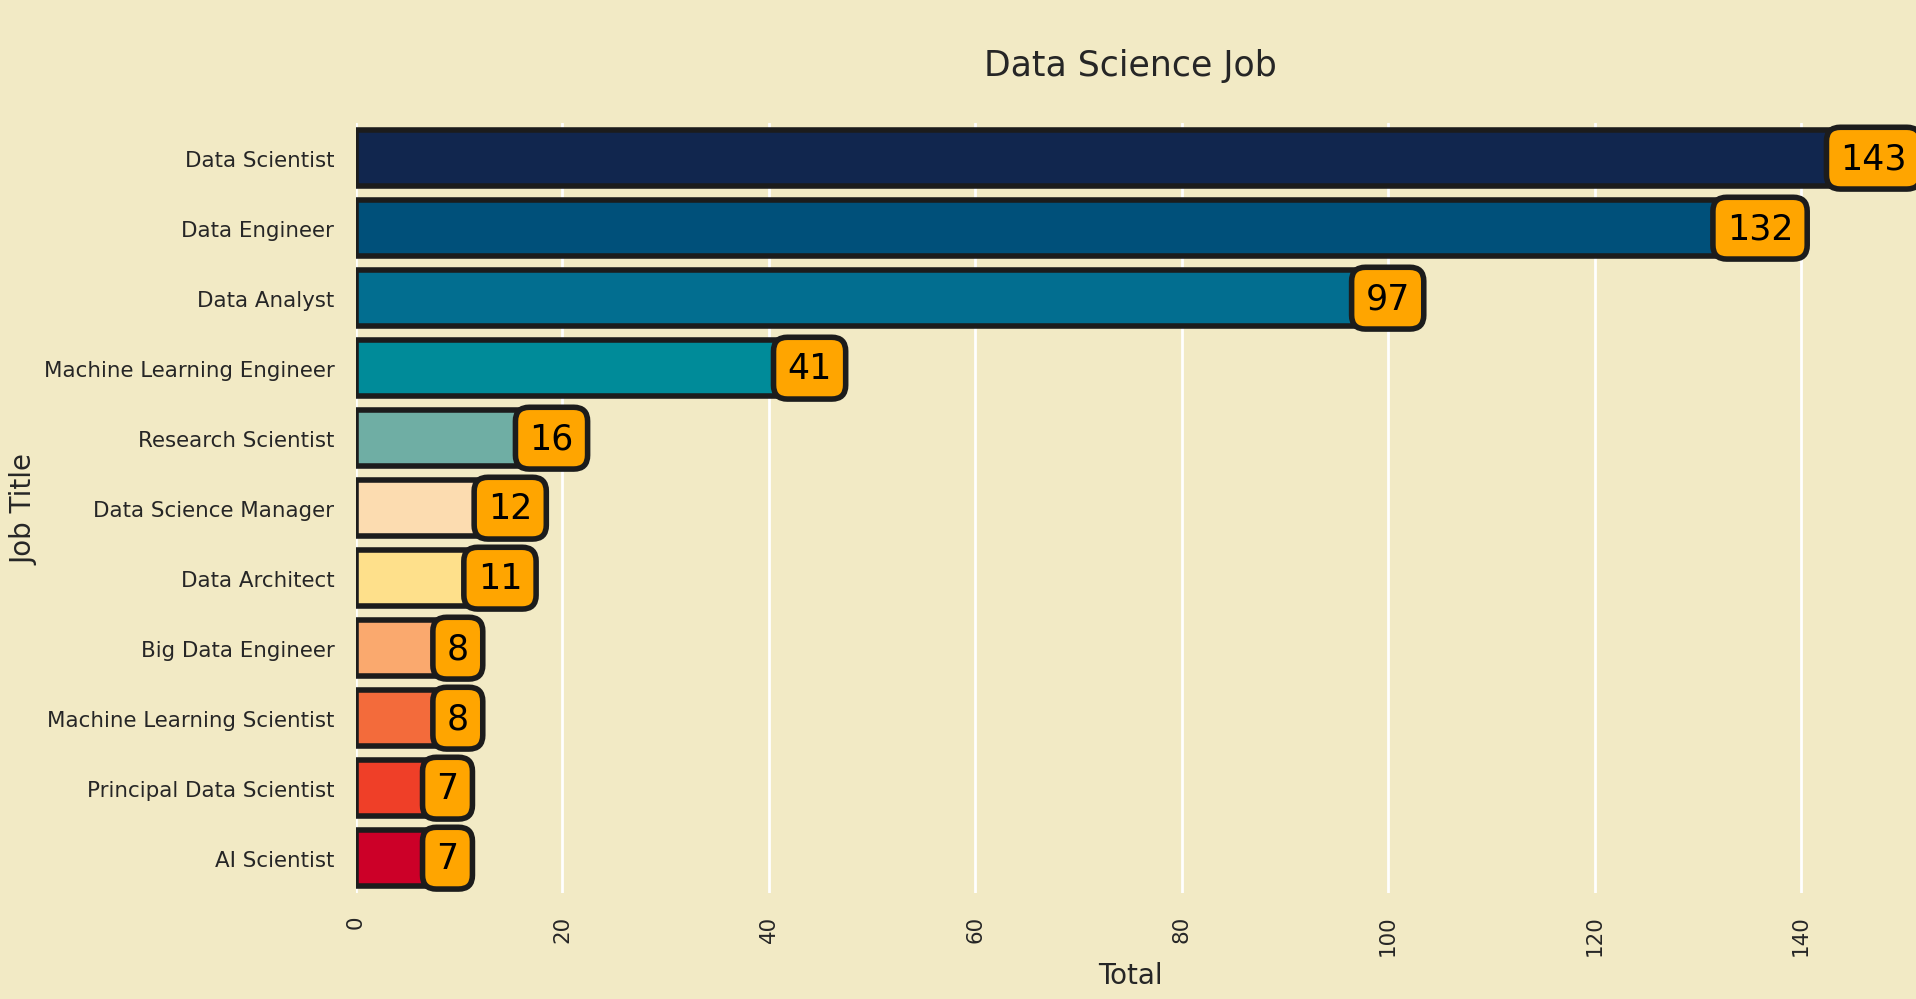

In [14]:
print("Let's have a look on the familiar data science jobs :")
plt.subplots(figsize=(20, 10))
p=sns.countplot(y=data["job title"],order=data["job title"].value_counts().index[:11],palette=palette, saturation=1, edgecolor = "#1c1c1c", linewidth = 4)
p.axes.set_title("\nData Science Job\n",fontsize=25)
p.axes.set_xlabel("Total",fontsize=20)
p.axes.set_ylabel("Job Title",fontsize=20)
p.axes.set_xticklabels(p.get_xticklabels(),rotation = 90)
for container in p.containers:
    p.bar_label(container,label_type="edge",padding=6,size=25,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth" : 4, "alpha": 1})


sns.despine(left=True, bottom=True)
plt.show()

Let's have a look on the company's origins :


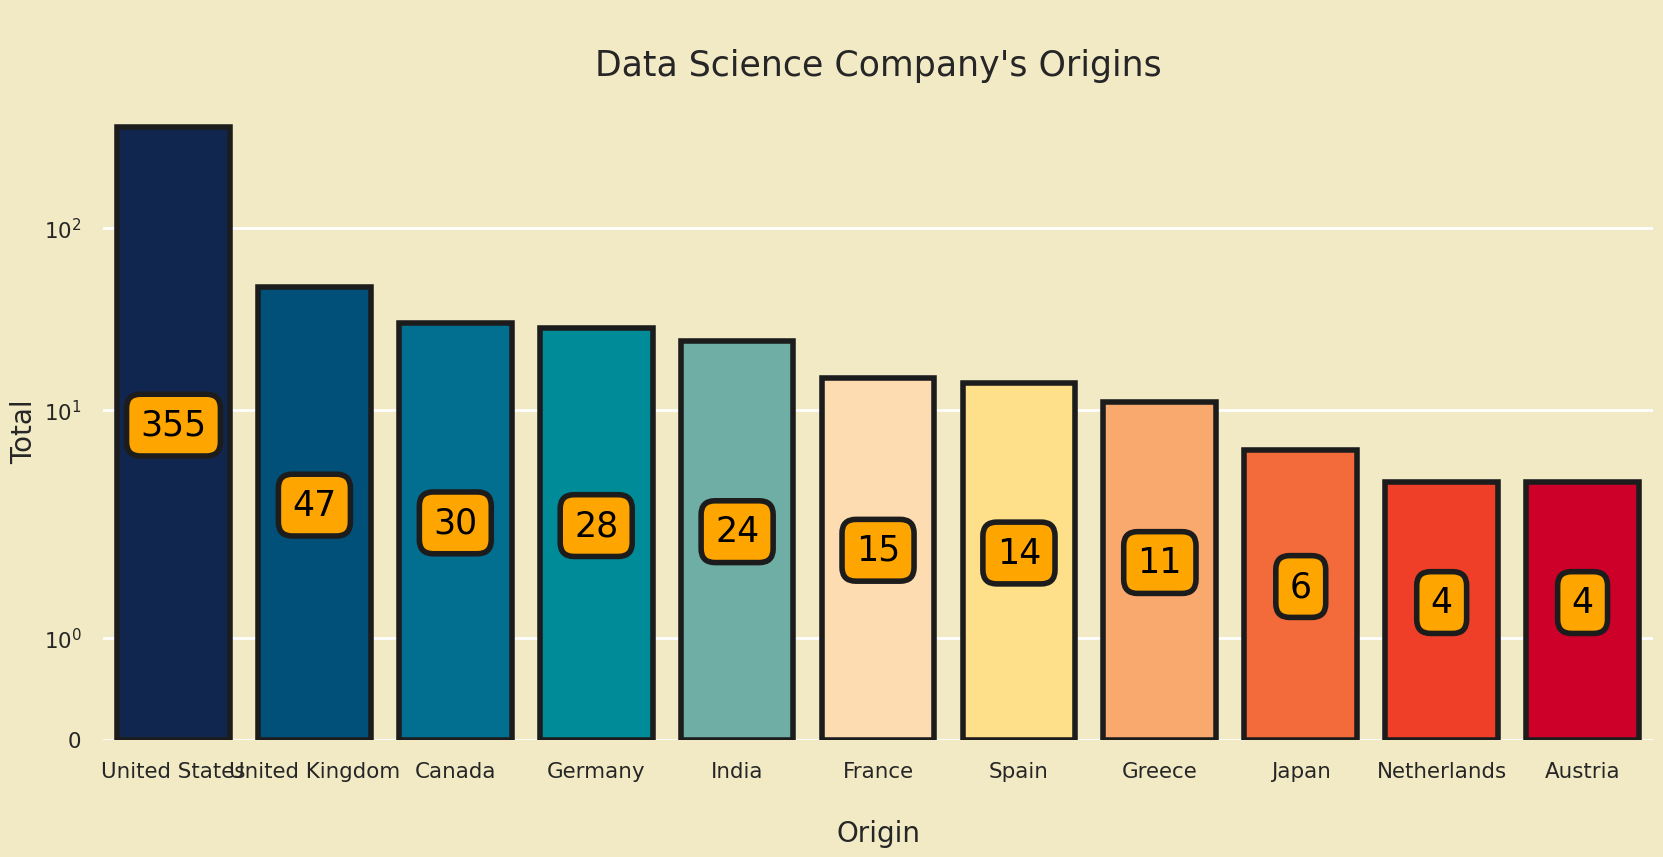

In [15]:
print("Let's have a look on the company's origins :")
plt.subplots(figsize=(20, 8))
p=sns.countplot(x=data["company location"],order=data["company location"].value_counts().index[:11],palette=palette, saturation=1, edgecolor = "#1c1c1c", linewidth = 4)
p.axes.set_yscale("symlog")
p.axes.set_title("\nData Science Company's Origins\n",fontsize=25)
p.axes.set_xlabel("\nOrigin",fontsize=20)
p.axes.set_ylabel("Total",fontsize=20)
p.axes.set_xticklabels(p.get_xticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="center",padding=6,size=25,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth" : 4, "alpha": 1})


sns.despine(left=True, bottom=True)
plt.show()

In [16]:
print("Companies In North America :")

fig = px.choropleth(data_frame = data["company location"].value_counts(),
                    locations=data["company location"].value_counts().index,locationmode="country names", color=data["company location"].value_counts().values,
                    color_continuous_scale=palette[:10],height= 600,scope="north america",
                    labels={"color":"Company","locations":"Country"})


fig.update_layout(title=dict(text= "Companies In North America",
                             y=0.95,x=0.5,xanchor= "center",yanchor= "top",font_color="black"),
                  margin=dict(l=0, r=0, b=0, t=0),
                  geo_bgcolor="#F2EAC5",
                  paper_bgcolor="#F2EAC5")

fig.show()

Companies In North America :


In [17]:
print("Companies In Europe :")

fig = px.choropleth(data_frame = data["company location"].value_counts(),
                    locations=data["company location"].value_counts().index,locationmode="country names", color=data["company location"].value_counts().values,
                    color_continuous_scale=palette[:10],height= 600,scope="europe",
                    labels={"color":"Company","locations":"Country"})


fig.update_layout(title=dict(text= "Companies In Europe",
                             y=0.95,x=0.5,xanchor= "center",yanchor= "top",font_color="black"),
                  margin=dict(l=0, r=0, b=0, t=0),
                  geo_bgcolor="#F2EAC5",
                  paper_bgcolor="#F2EAC5")

fig.show()

Companies In Europe :


# Salary

Let's have a look on the distribution of salaries :


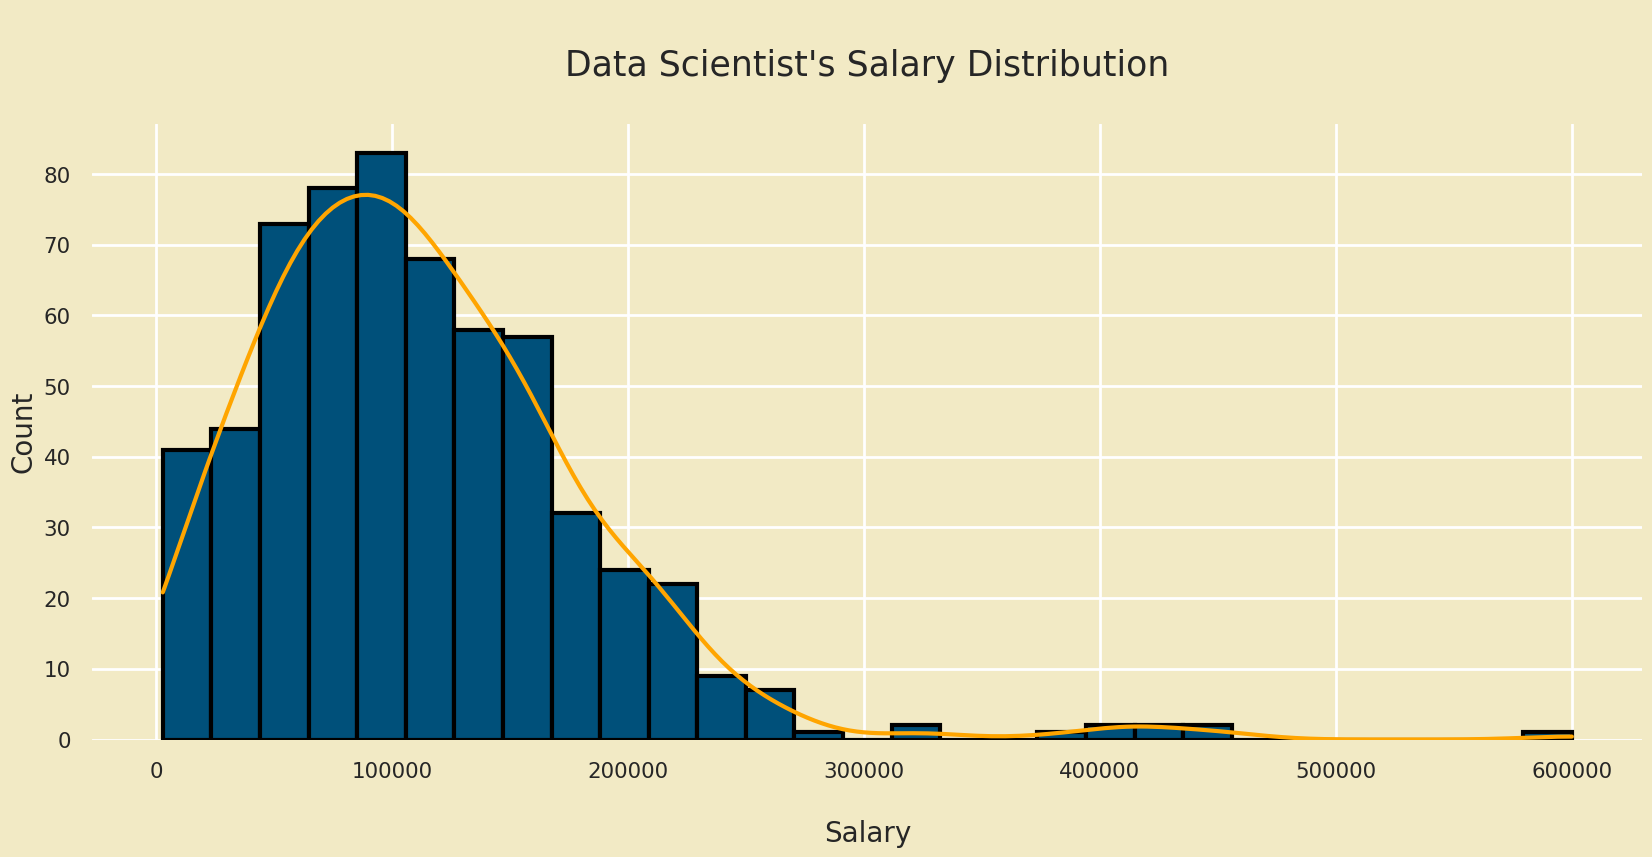

In [18]:
print(f"Let's have a look on the distribution of salaries :")
plt.subplots(figsize=(20, 8))
p = sns.histplot(data["salary in usd"],color=palette[1],kde=True,bins="auto",alpha=1,fill=True,edgecolor="black",linewidth=3)
p.axes.lines[0].set_color("orange")
p.axes.set_title("\nData Scientist's Salary Distribution\n",fontsize=25)
plt.ylabel("Count",fontsize=20)
plt.xlabel("\nSalary",fontsize=20)
sns.despine(left=True, bottom=True)

plt.show()

Let's have a look on the highest paid data science jobs :


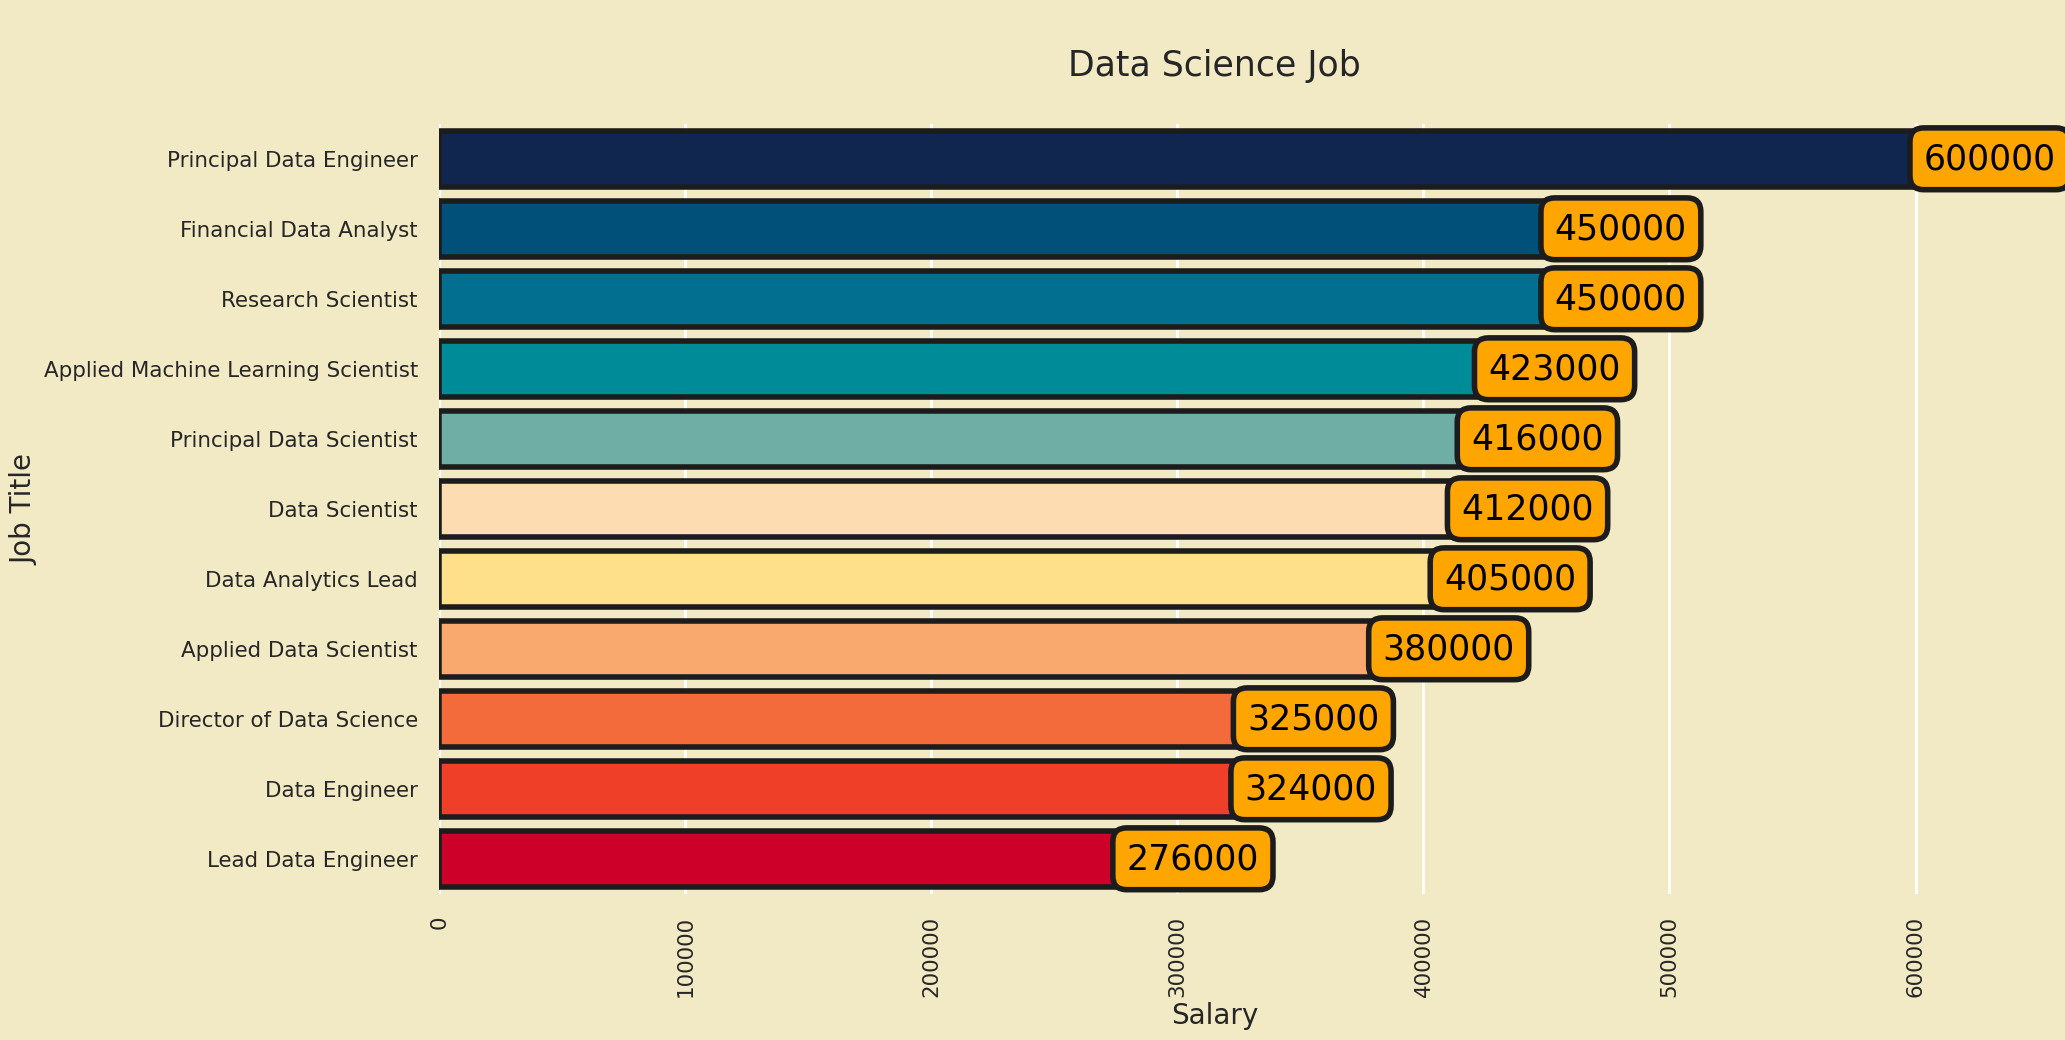

In [19]:
data_high = data.copy()
data_high = pd.DataFrame(data_high.groupby("job title")["salary in usd"].max())

print("Let's have a look on the highest paid data science jobs :")
plt.subplots(figsize=(20, 10))
p=sns.barplot(y=data_high.index,x=data_high["salary in usd"],order=data_high.sort_values("salary in usd",ascending=False).index[:11],palette=palette, saturation=1, edgecolor = "#1c1c1c", linewidth = 4)
p.axes.set_title("\nData Science Job\n",fontsize=25)
p.axes.set_xlabel("Salary",fontsize=20)
p.axes.set_ylabel("Job Title",fontsize=20)
p.axes.set_xticklabels(p.get_xticklabels(),rotation = 90)
for container in p.containers:
    p.bar_label(container,label_type="edge",padding=6,size=25,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth" : 4, "alpha": 1})


sns.despine(left=True, bottom=True)
plt.show()

Let's have a look on the average paid data science jobs :


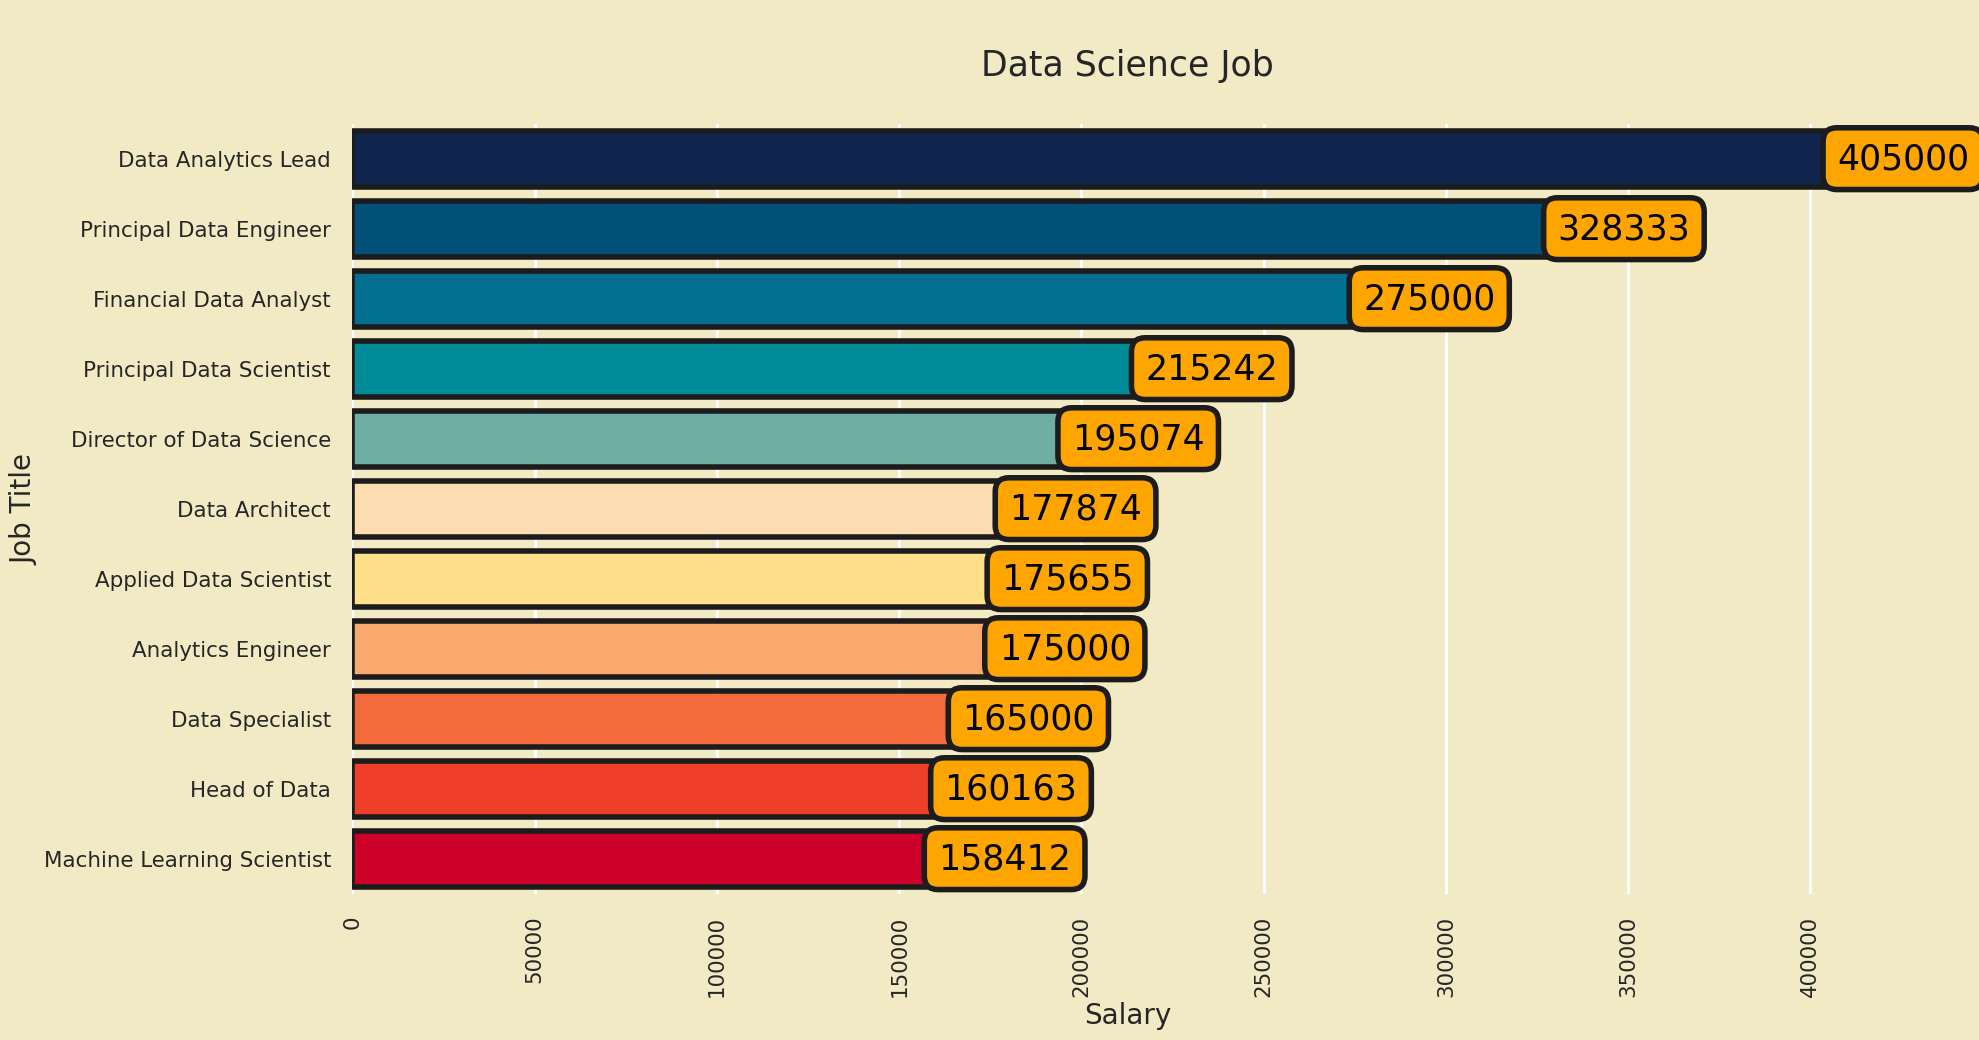

In [20]:
data_avg = data.copy()
data_avg = pd.DataFrame(data_avg.groupby("job title")["salary in usd"].mean())

print("Let's have a look on the average paid data science jobs :")
plt.subplots(figsize=(20, 10))
p=sns.barplot(y=data_avg.index,x=data_avg["salary in usd"],order=data_avg.sort_values("salary in usd",ascending=False).index[:11],palette=palette, saturation=1, edgecolor = "#1c1c1c", linewidth = 4)
p.axes.set_title("\nData Science Job\n",fontsize=25)
p.axes.set_xlabel("Salary",fontsize=20)
p.axes.set_ylabel("Job Title",fontsize=20)
p.axes.set_xticklabels(p.get_xticklabels(),rotation = 90)
for container in p.containers:
    p.bar_label(container,label_type="edge",padding=6,size=25,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth" : 4, "alpha": 1})


sns.despine(left=True, bottom=True)
plt.show()

Let's have a look on the timeline of average salary :


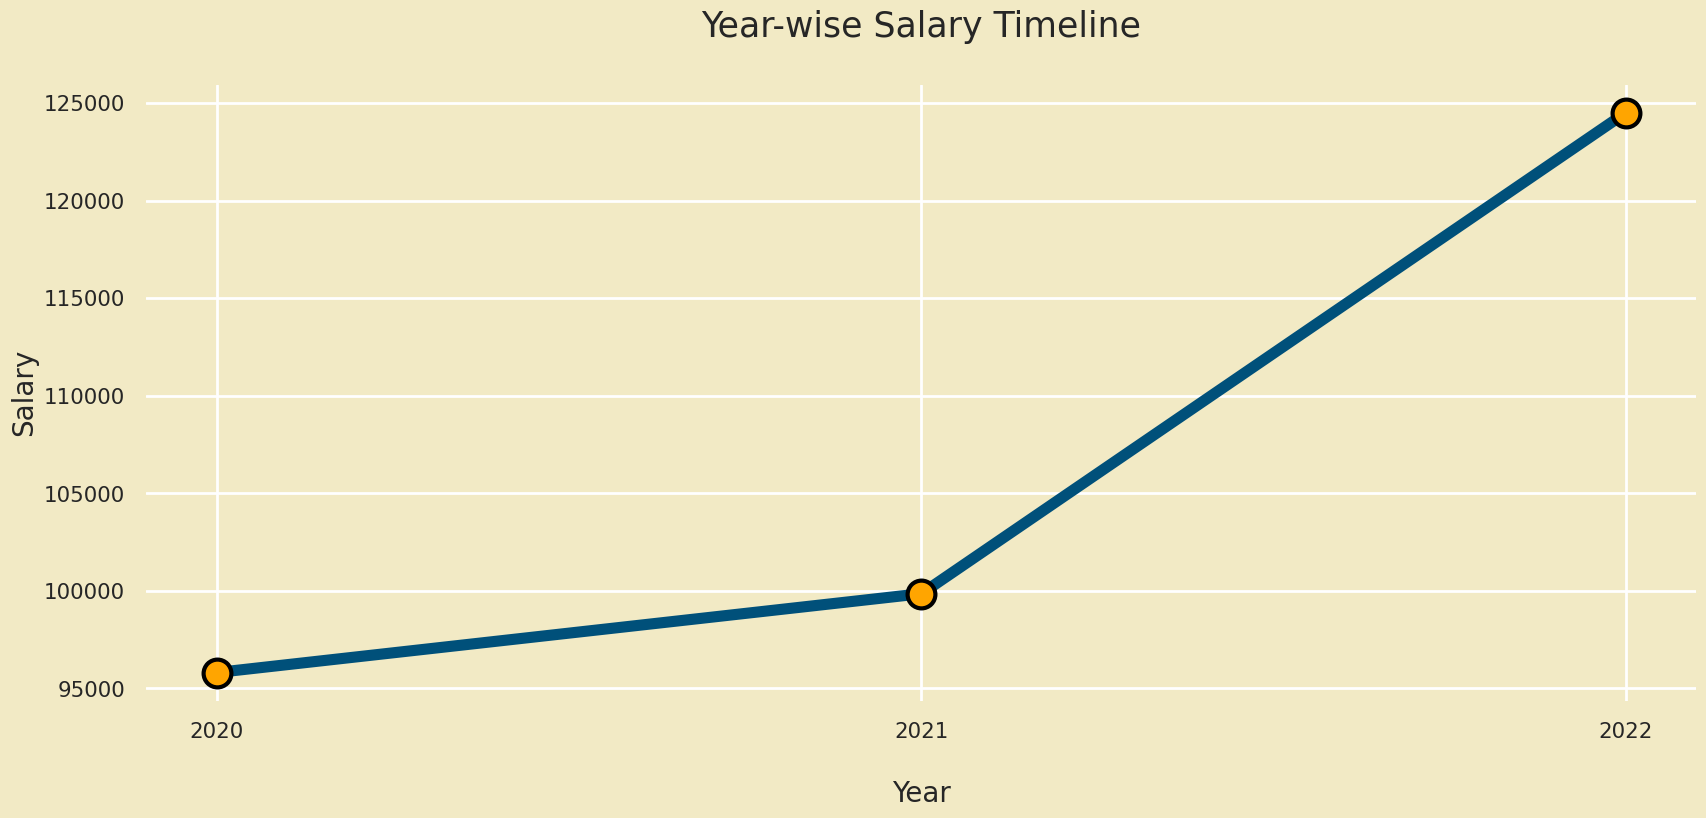

In [21]:
data_timeline = pd.DataFrame(data.groupby("work year")["salary in usd"].mean())
data_timeline = data_timeline.reset_index()
data_timeline["work year"].replace({2020:"2020",2021:"2021",2022:"2022"},inplace=True)

print(f"Let's have a look on the timeline of average salary :")
plt.subplots(figsize=(20,8))

p=sns.lineplot(x=data_timeline["work year"] ,y=data_timeline["salary in usd"],data=data_timeline,color=palette[1],marker="o",linewidth=8,markersize=20,markerfacecolor="orange",markeredgecolor="black",markeredgewidth=3)
p.axes.set_title("Year-wise Salary Timeline\n",fontsize=25)
p.axes.set_xlabel("\nYear",fontsize=20)
p.axes.set_ylabel("Salary",fontsize=20)

sns.despine(left=True, bottom=True)
plt.show()

# Experience Level

Let's have a look on the ratio of experience level :


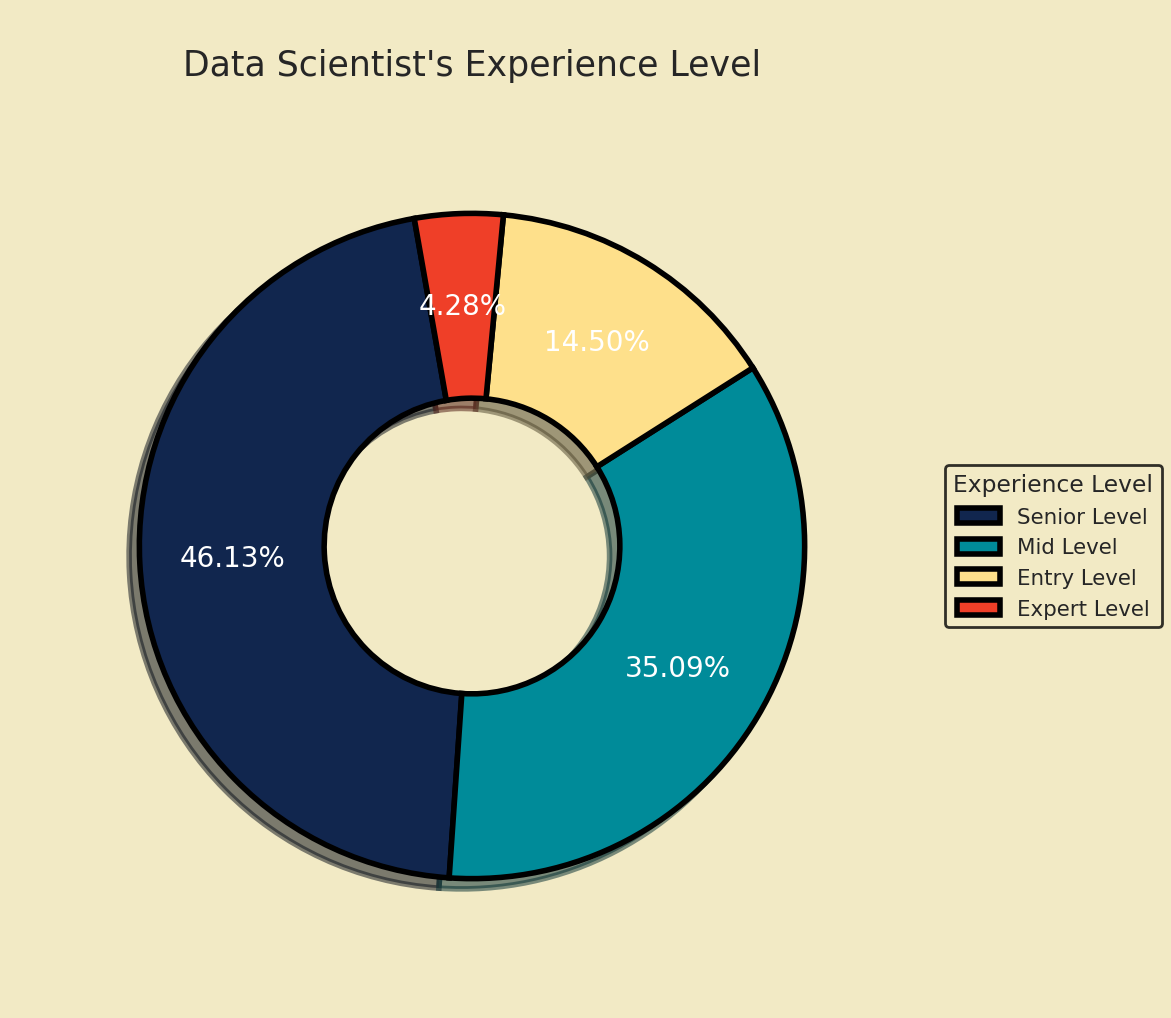

In [22]:
print(f"Let's have a look on the ratio of experience level :")
plt.subplots(figsize=(12, 12))

labels = "Senior Level","Mid Level","Entry Level","Expert Level"
size = 0.5

wedges, texts, autotexts = plt.pie([data["experience level"].value_counts().values[0],
                                    data["experience level"].value_counts().values[1],
                                    data["experience level"].value_counts().values[2],
                                    data["experience level"].value_counts().values[3]],
                                    explode = (0,0,0,0),
                                    textprops=dict(size= 20, color= "white"),
                                    autopct="%.2f%%",
                                    pctdistance = 0.72,
                                    radius=.9,
                                    colors = palette[0:11:3],
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "black",
                                    linewidth = 4),
                                    startangle = 100)

plt.legend(wedges, labels, title="Experience Level",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1), edgecolor = "black")
plt.title("\nData Scientist's Experience Level",fontsize=25)
plt.show()

Let's have a look on the experience level :


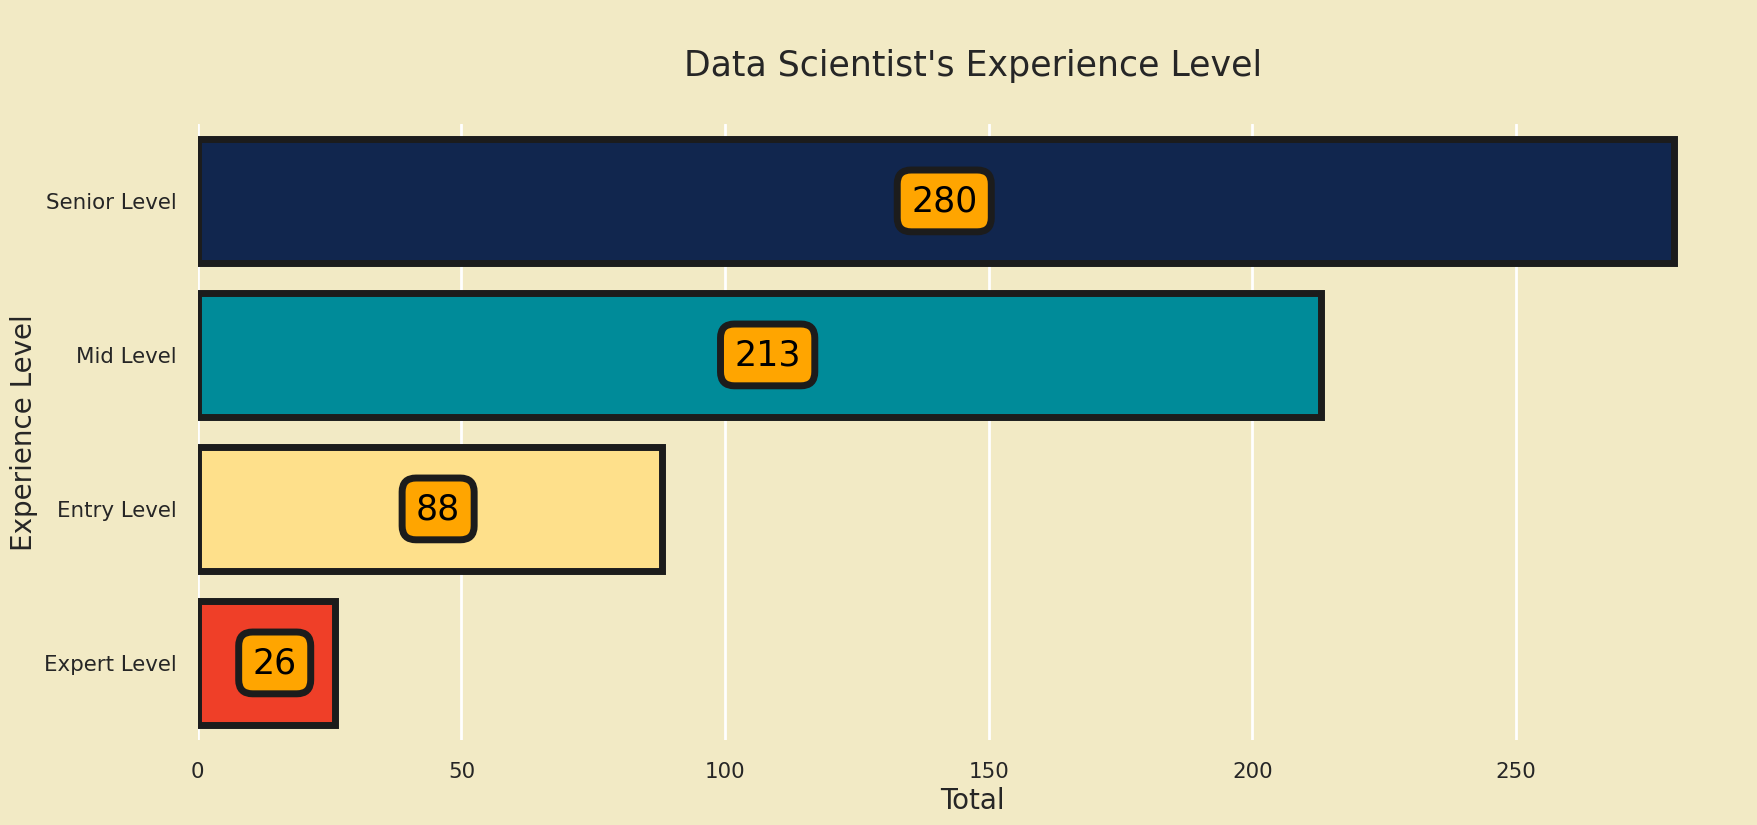

In [23]:
print("Let's have a look on the experience level :")
plt.subplots(figsize=(20, 8))
p=sns.countplot(y=data["experience level"],order=data["experience level"].value_counts().index,palette=palette[0:11:3], saturation=1, edgecolor = "#1c1c1c", linewidth = 5)
# p.axes.set_yscale("symlog")
p.axes.set_title("\nData Scientist's Experience Level\n",fontsize=25)
p.axes.set_ylabel("Experience Level",fontsize=20)
p.axes.set_xlabel("Total",fontsize=20)
p.axes.set_yticklabels(p.get_yticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="center",padding=6,size=25,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth" : 5, "alpha": 1})


sns.despine(left=True, bottom=True)
plt.show()

Let's have a look on the salary distribution of experience level :


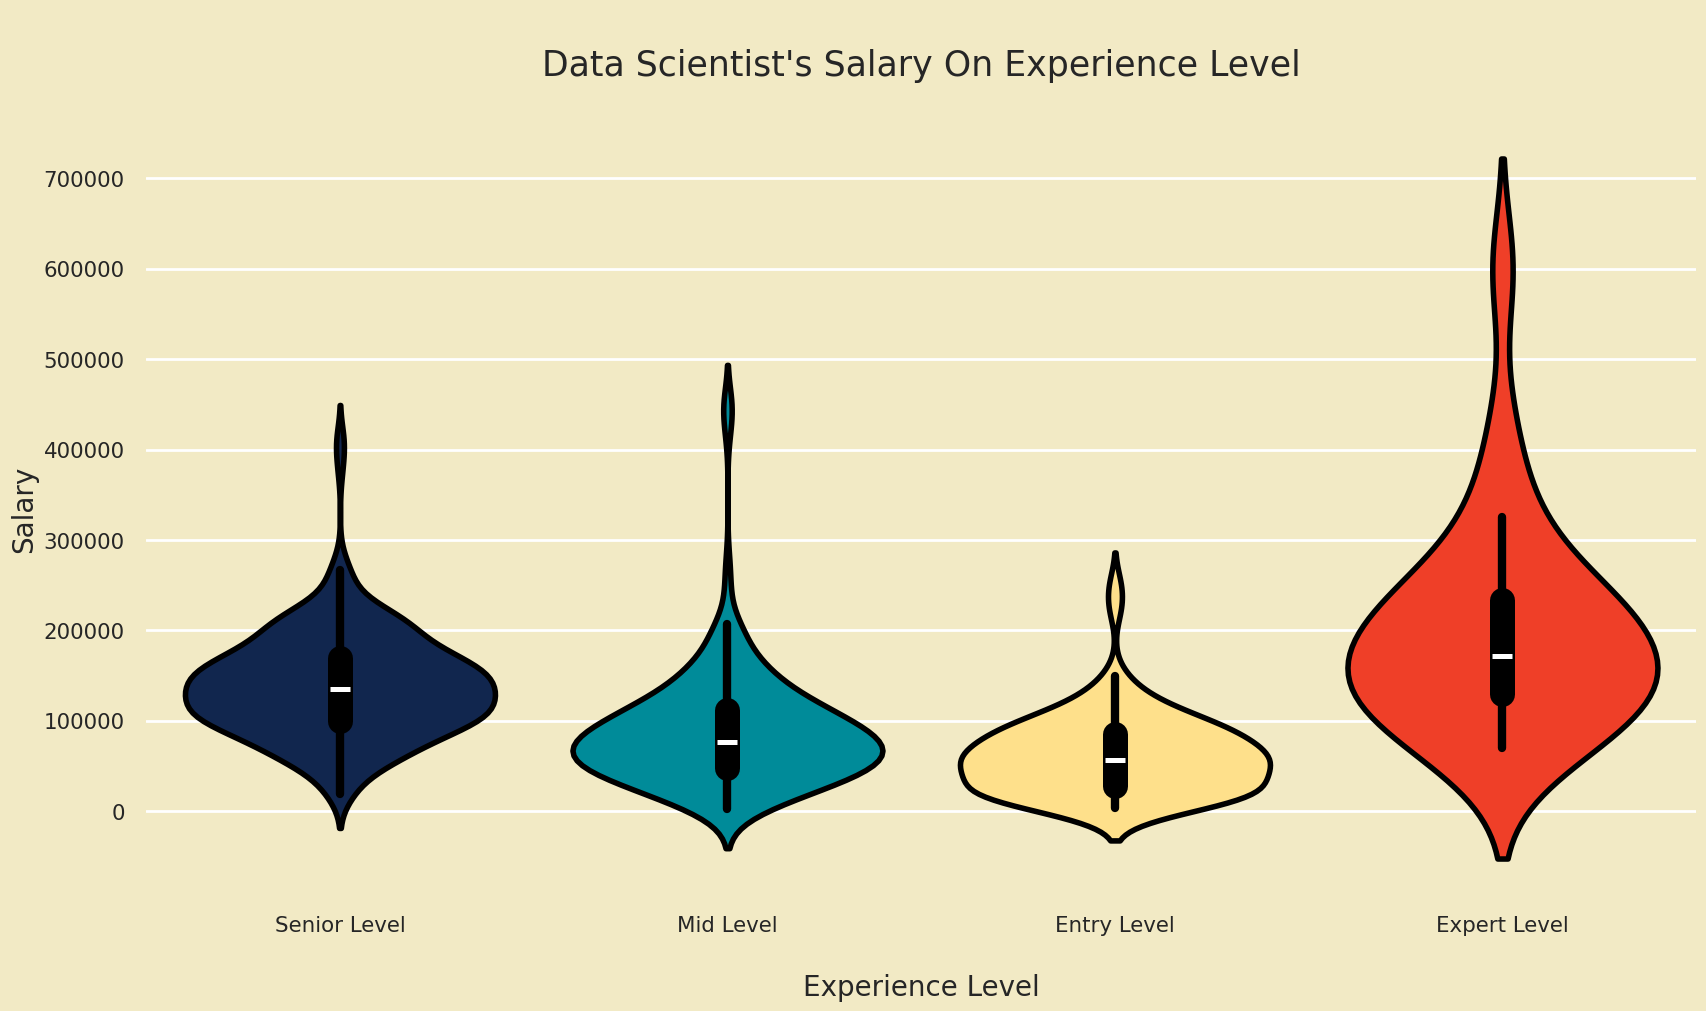

In [24]:
print("Let's have a look on the salary distribution of experience level :")
plt.subplots(figsize=(20, 10))

p=sns.violinplot(x=data["experience level"],y=data["salary in usd"],order=data["experience level"].value_counts().index,palette=palette[0:11:3],saturation=1,linewidth=4,edgecolor="black")
p.axes.set_title("\nData Scientist's Salary On Experience Level\n",fontsize=25)
p.axes.set_xlabel("\nExperience Level",fontsize=20)
p.axes.set_ylabel("Salary",fontsize=20)

sns.despine(left=True, bottom=True)
plt.show()

# Employment Type

Let's have a look on the employment type :


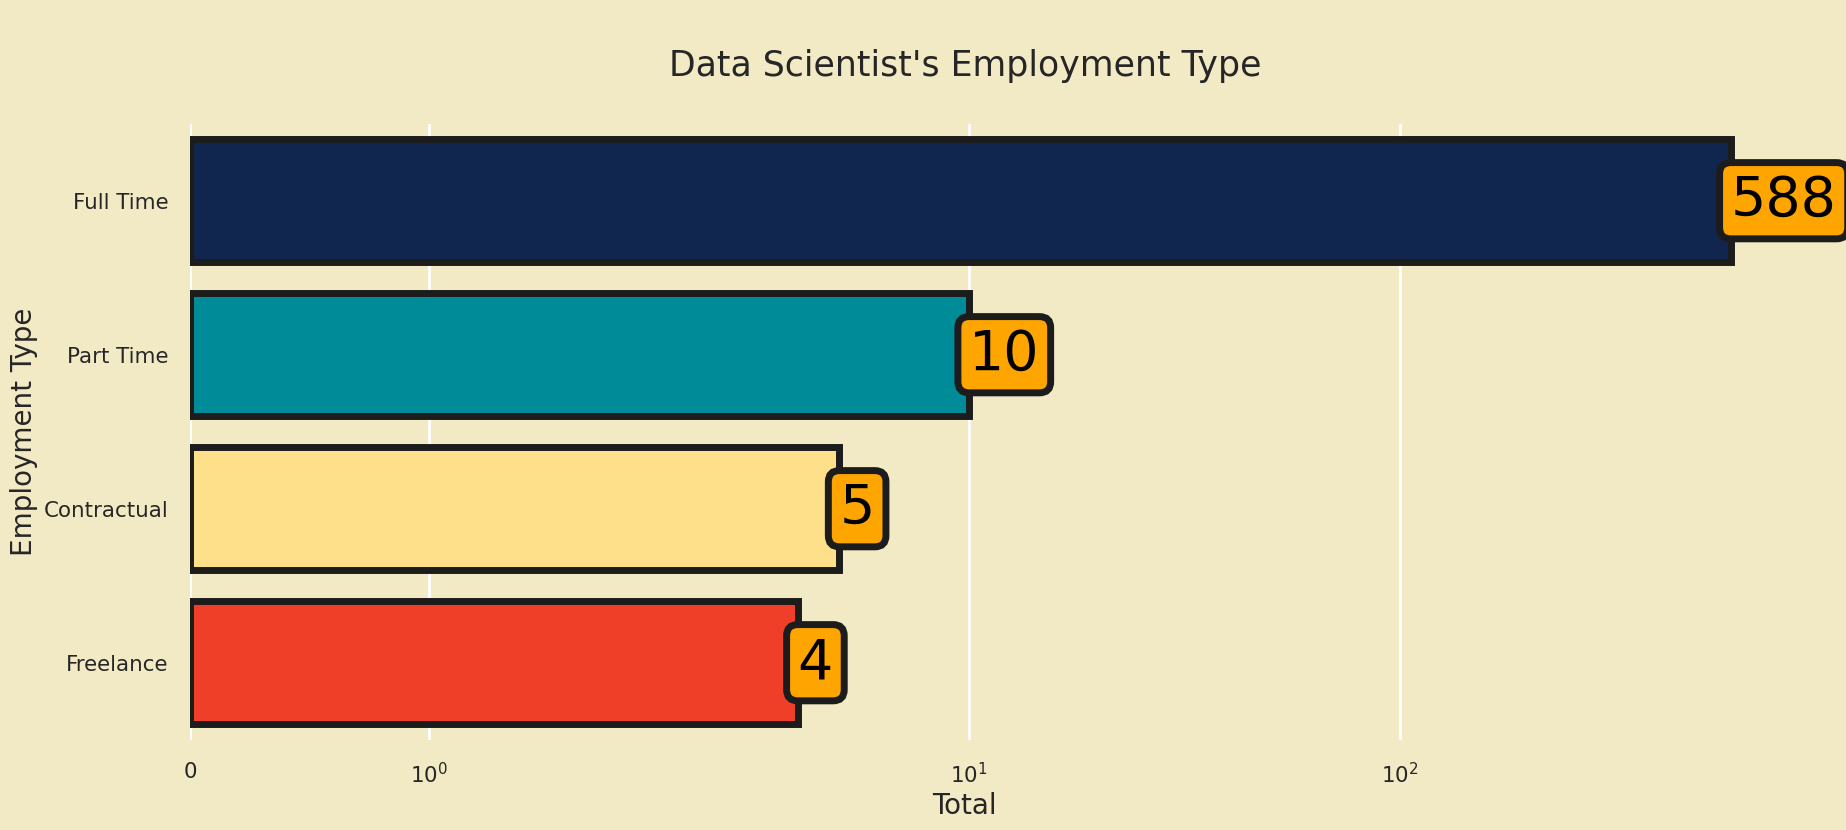

In [25]:
print("Let's have a look on the employment type :")
plt.subplots(figsize=(20, 8))
p=sns.countplot(y=data["employment type"],order=data["employment type"].value_counts().index,palette=palette[0:11:3], saturation=1, edgecolor = "#1c1c1c", linewidth = 5)
p.axes.set_xscale("symlog")
p.axes.set_title("\nData Scientist's Employment Type\n",fontsize=25)
p.axes.set_ylabel("Employment Type",fontsize=20)
p.axes.set_xlabel("Total",fontsize=20)
p.axes.set_yticklabels(p.get_yticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="edge",padding=0,size=40,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth" : 5, "alpha": 1})


sns.despine(left=True, bottom=True)
plt.show()

Let's have a look on the salary distribution of employment type :


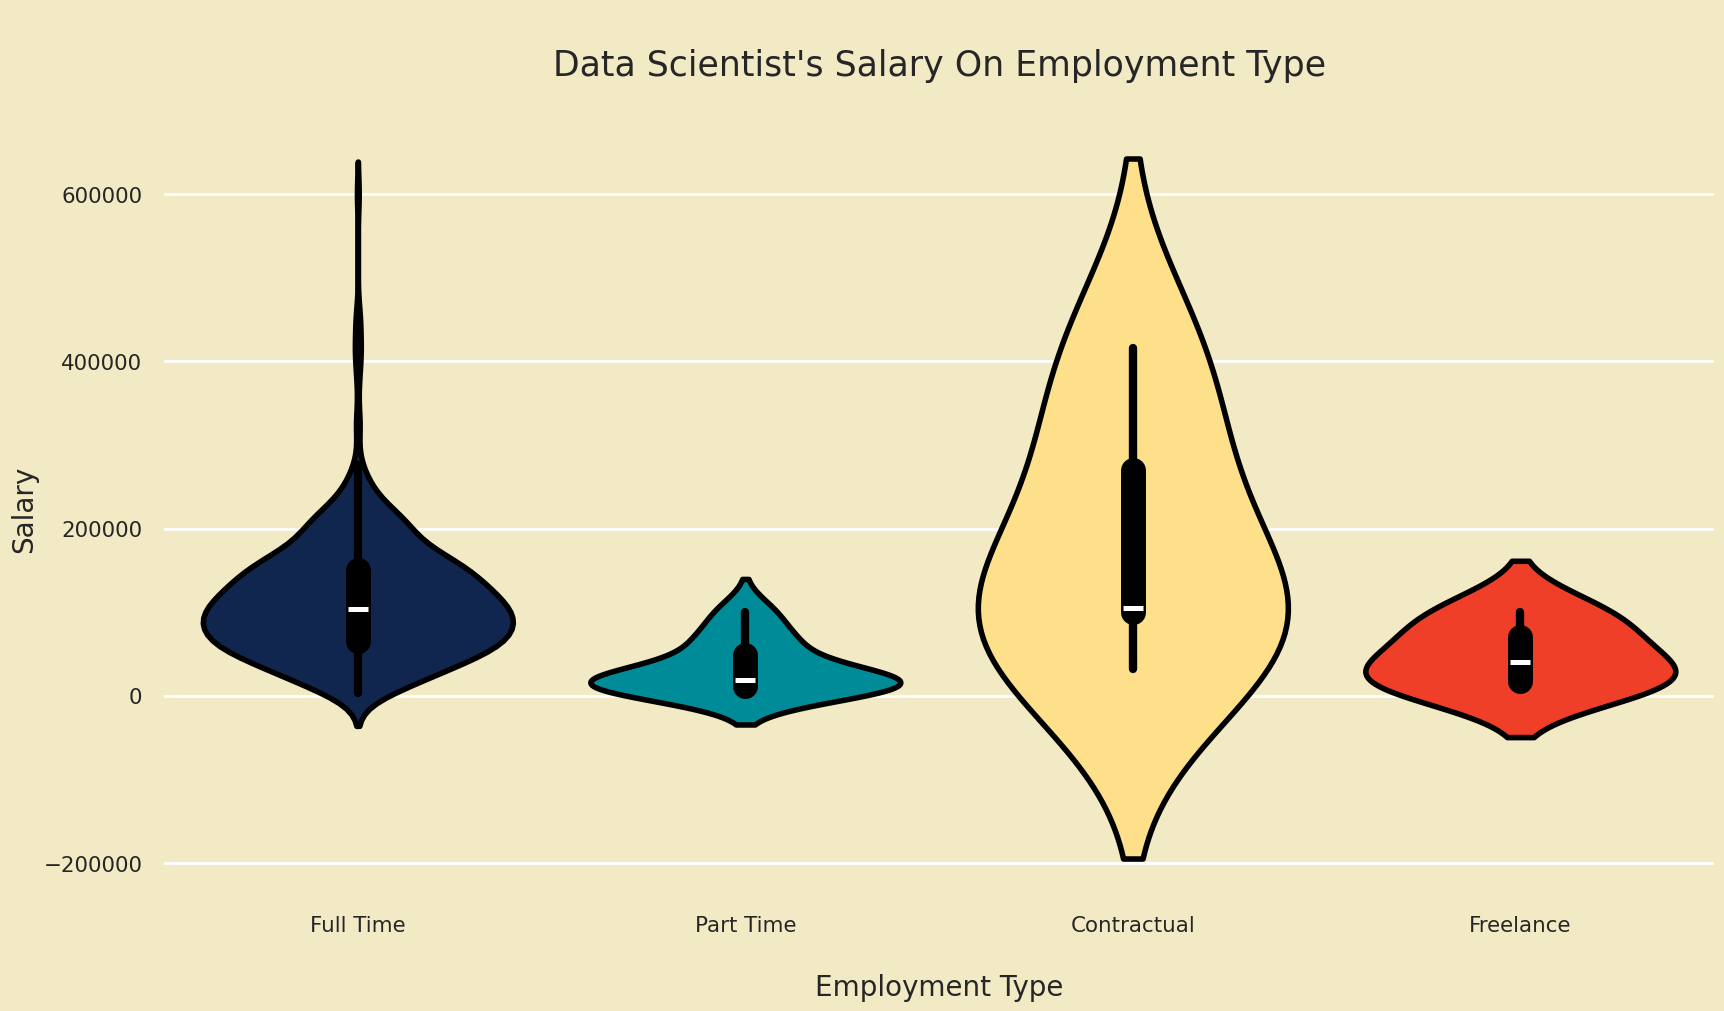

In [26]:
print("Let's have a look on the salary distribution of employment type :")
plt.subplots(figsize=(20, 10))

p=sns.violinplot(x=data["employment type"],y=data["salary in usd"],order=data["employment type"].value_counts().index,palette=palette[0:11:3],saturation=1,linewidth=4,edgecolor="black")
p.axes.set_title("\nData Scientist's Salary On Employment Type\n",fontsize=25)
p.axes.set_xlabel("\nEmployment Type",fontsize=20)
p.axes.set_ylabel("Salary",fontsize=20)

sns.despine(left=True, bottom=True)
plt.show()

# Company Size

Let's have a look on the ratio of company sizes :


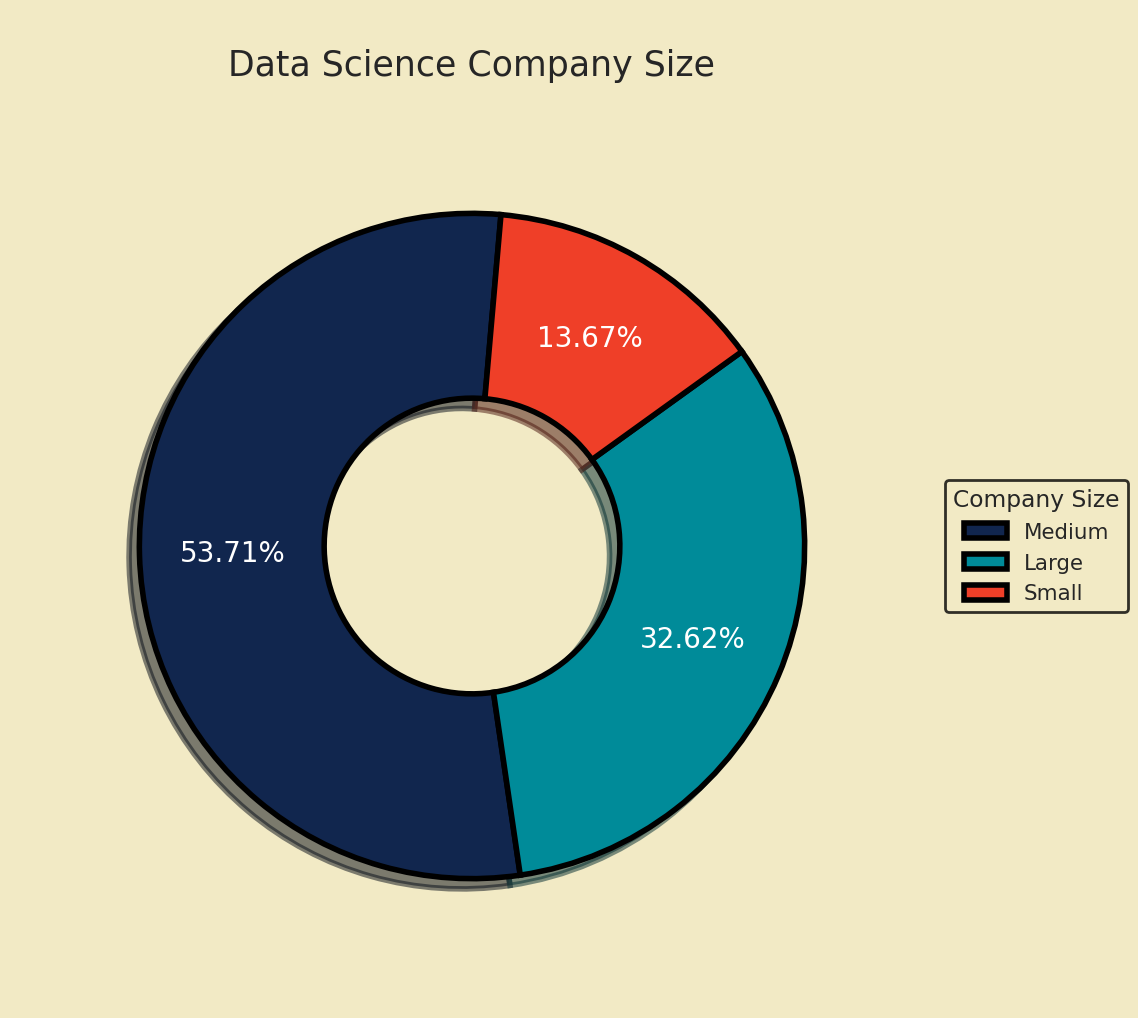

In [27]:
print(f"Let's have a look on the ratio of company sizes :")
plt.subplots(figsize=(12, 12))

labels = "Medium","Large","Small"
size = 0.5

wedges, texts, autotexts = plt.pie([data["company size"].value_counts().values[0],
                                    data["company size"].value_counts().values[1],
                                    data["company size"].value_counts().values[2]],
                                    explode = (0,0,0),
                                    textprops=dict(size= 20, color= "white"),
                                    autopct="%.2f%%",
                                    pctdistance = 0.72,
                                    radius=.9,
                                    colors = ["#11264e","#008b99","#ef3f28"],
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "black",
                                    linewidth = 4),
                                    startangle = 85)

plt.legend(wedges, labels, title="Company Size",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1), edgecolor = "black")
plt.title("\nData Science Company Size",fontsize=25)
plt.show()

Let's have a look on the company size :


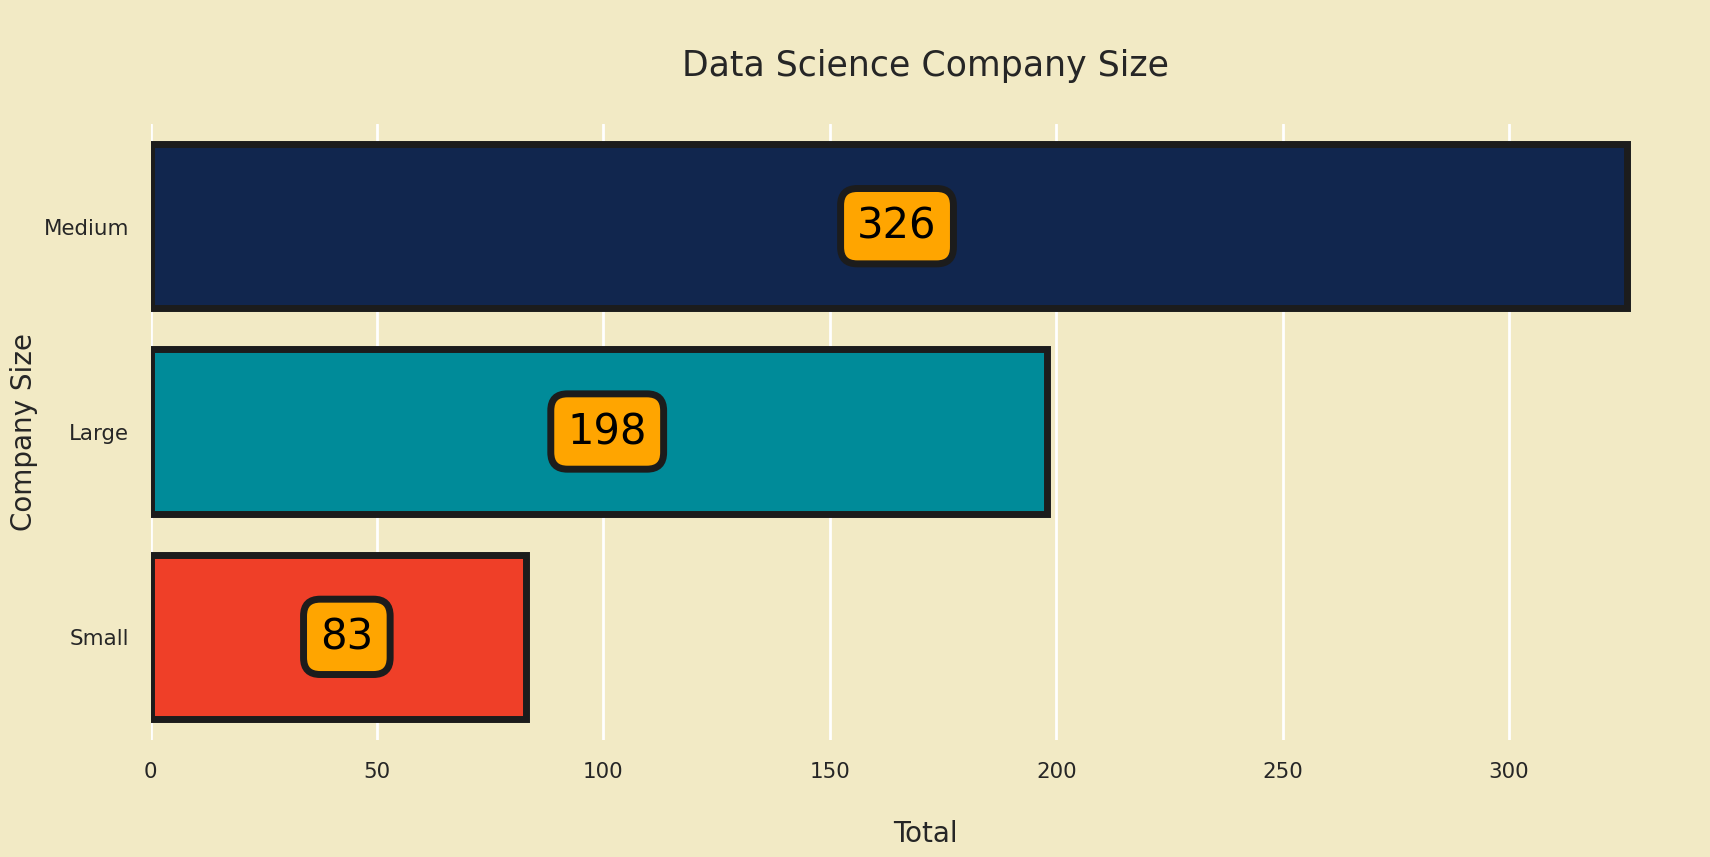

In [28]:
print("Let's have a look on the company size :")
plt.subplots(figsize=(20, 8))
p=sns.countplot(y=data["company size"],order=data["company size"].value_counts().index,palette=["#11264e","#008b99","#ef3f28"], saturation=1, edgecolor = "#1c1c1c", linewidth = 5)
# p.axes.set_yscale("linear")
p.axes.set_title("\nData Science Company Size\n",fontsize=25)
p.axes.set_ylabel("Company Size",fontsize=20)
p.axes.set_xlabel("\nTotal",fontsize=20)
p.axes.set_yticklabels(p.get_yticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="center",padding=6,size=30,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth" : 5, "alpha": 1})


sns.despine(left=True, bottom=True)
plt.show()

Let's have a look on the salary distribution of company size :


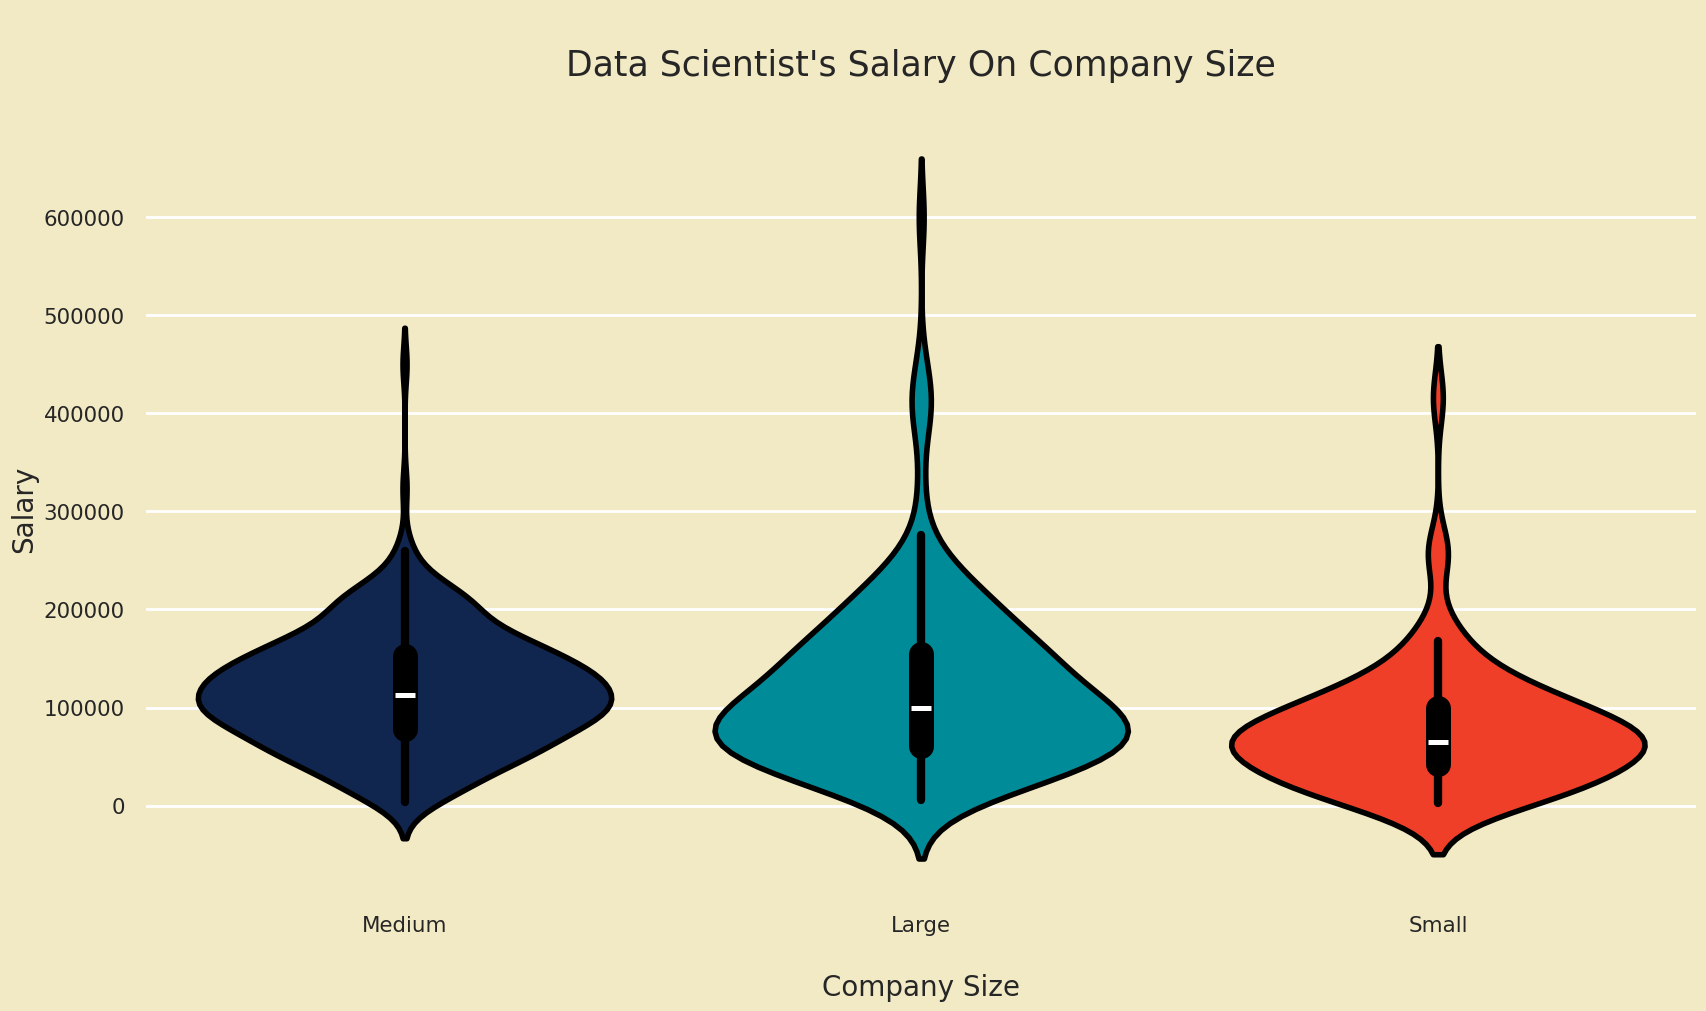

In [29]:
print("Let's have a look on the salary distribution of company size :")
plt.subplots(figsize=(20, 10))

p=sns.violinplot(x=data["company size"],y=data["salary in usd"],order=data["company size"].value_counts().index,palette=["#11264e","#008b99","#ef3f28"],saturation=1,linewidth=4,edgecolor="black")
p.axes.set_title("\nData Scientist's Salary On Company Size\n",fontsize=25)
p.axes.set_xlabel("\nCompany Size",fontsize=20)
p.axes.set_ylabel("Salary",fontsize=20)

sns.despine(left=True, bottom=True)
plt.show()

# Remote Job

Let's have a look on the ratio of job types :


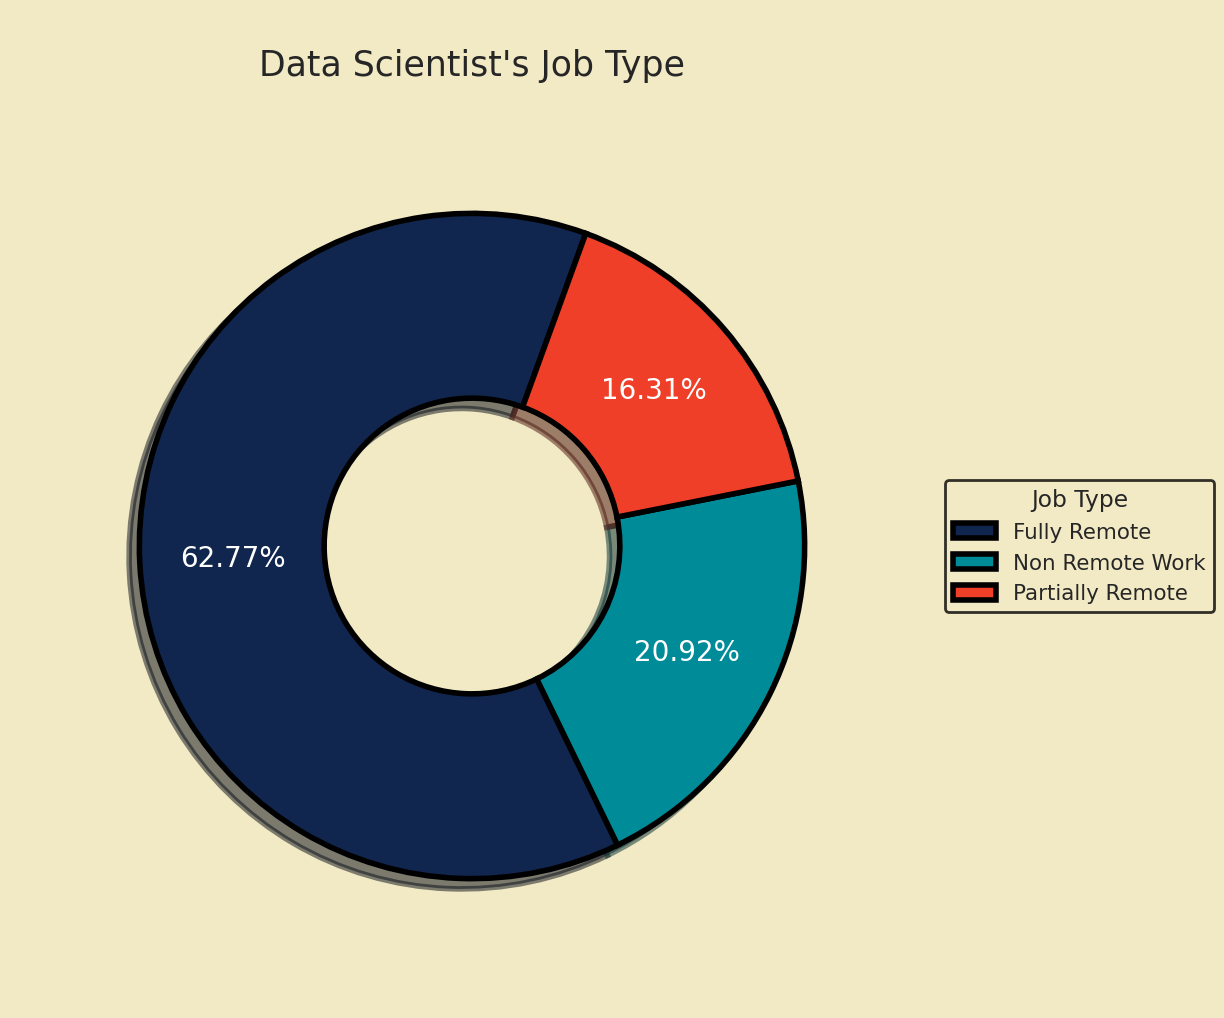

In [30]:
print(f"Let's have a look on the ratio of job types :")
plt.subplots(figsize=(12, 12))

labels = "Fully Remote","Non Remote Work","Partially Remote"
size = 0.5

wedges, texts, autotexts = plt.pie([data["remote ratio"].value_counts().values[0],
                                    data["remote ratio"].value_counts().values[1],
                                    data["remote ratio"].value_counts().values[2]],
                                    explode = (0,0,0),
                                    textprops=dict(size= 20, color= "white"),
                                    autopct="%.2f%%",
                                    pctdistance = 0.72,
                                    radius=.9,
                                    colors = ["#11264e","#008b99","#ef3f28"],
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "black",
                                    linewidth = 4),
                                    startangle = 70)

plt.legend(wedges, labels, title="Job Type",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1), edgecolor = "black")
plt.title("\nData Scientist's Job Type",fontsize=25)
plt.show()

Let's have a look on the job types :


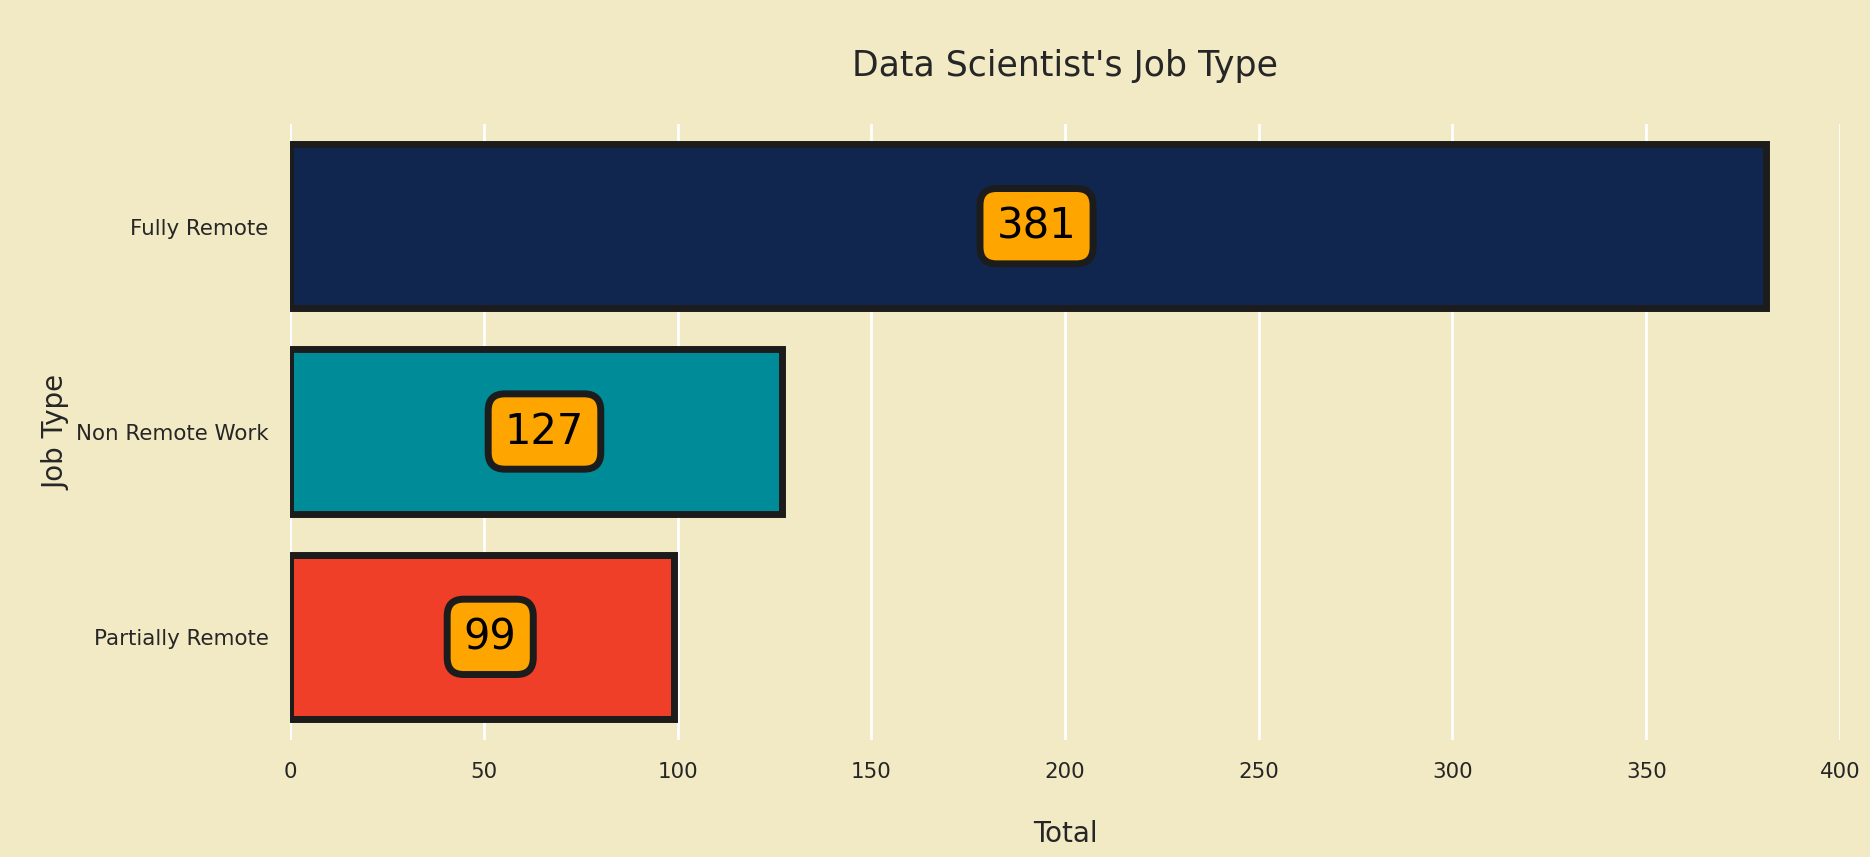

In [31]:
print("Let's have a look on the job types :")
plt.subplots(figsize=(20, 8))
p=sns.countplot(y=data["remote ratio"],order=data["remote ratio"].value_counts().index,palette=["#11264e","#008b99","#ef3f28"], saturation=1, edgecolor = "#1c1c1c", linewidth = 5)
p.axes.set_xscale("linear")
p.axes.set_title("\nData Scientist's Job Type\n",fontsize=25)
p.axes.set_ylabel("\nJob Type",fontsize=20)
p.axes.set_xlabel("\nTotal",fontsize=20)
p.axes.set_yticklabels(p.get_yticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="center",padding=6,size=30,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth" : 5, "alpha": 1})


sns.despine(left=True, bottom=True)
plt.show()

Let's have a look on the salary distribution of job types :


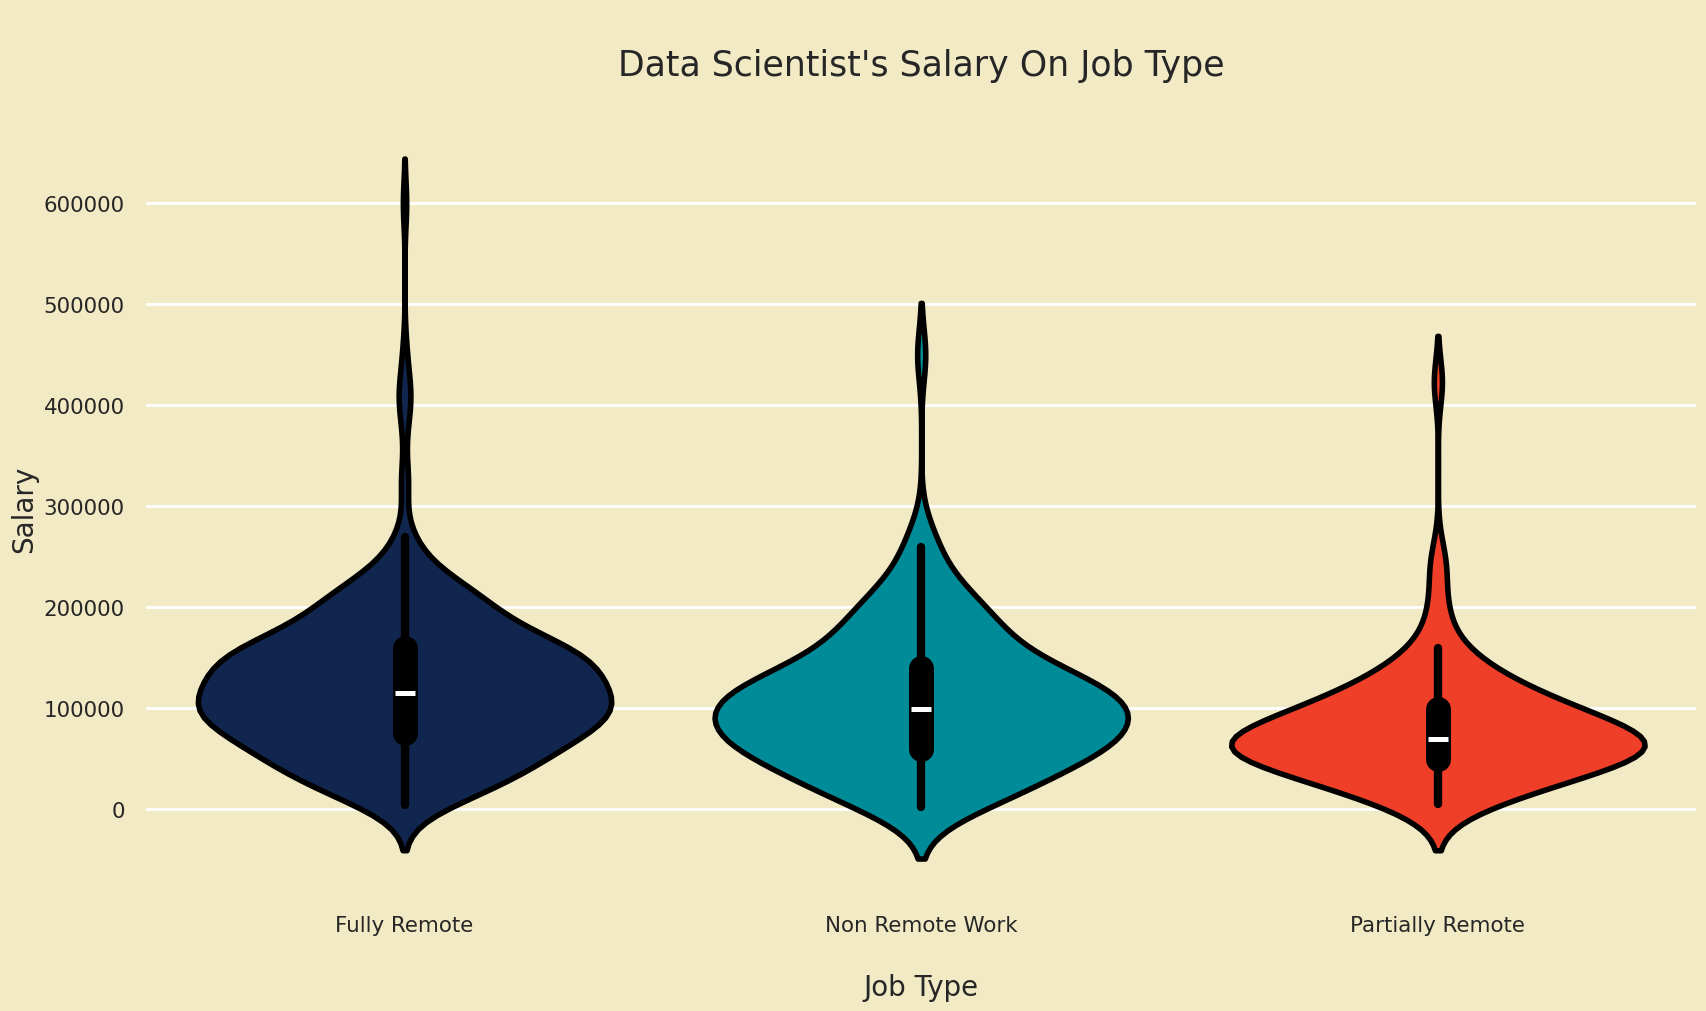

In [32]:
print("Let's have a look on the salary distribution of job types :")
plt.subplots(figsize=(20, 10))

p=sns.violinplot(x=data["remote ratio"],y=data["salary in usd"],order=data["remote ratio"].value_counts().index,palette=["#11264e","#008b99","#ef3f28"],saturation=1,linewidth=4,edgecolor="black")
p.axes.set_title("\nData Scientist's Salary On Job Type\n",fontsize=25)
p.axes.set_xlabel("\nJob Type",fontsize=20)
p.axes.set_ylabel("Salary",fontsize=20)

sns.despine(left=True, bottom=True)
plt.show()

# Correlation Map

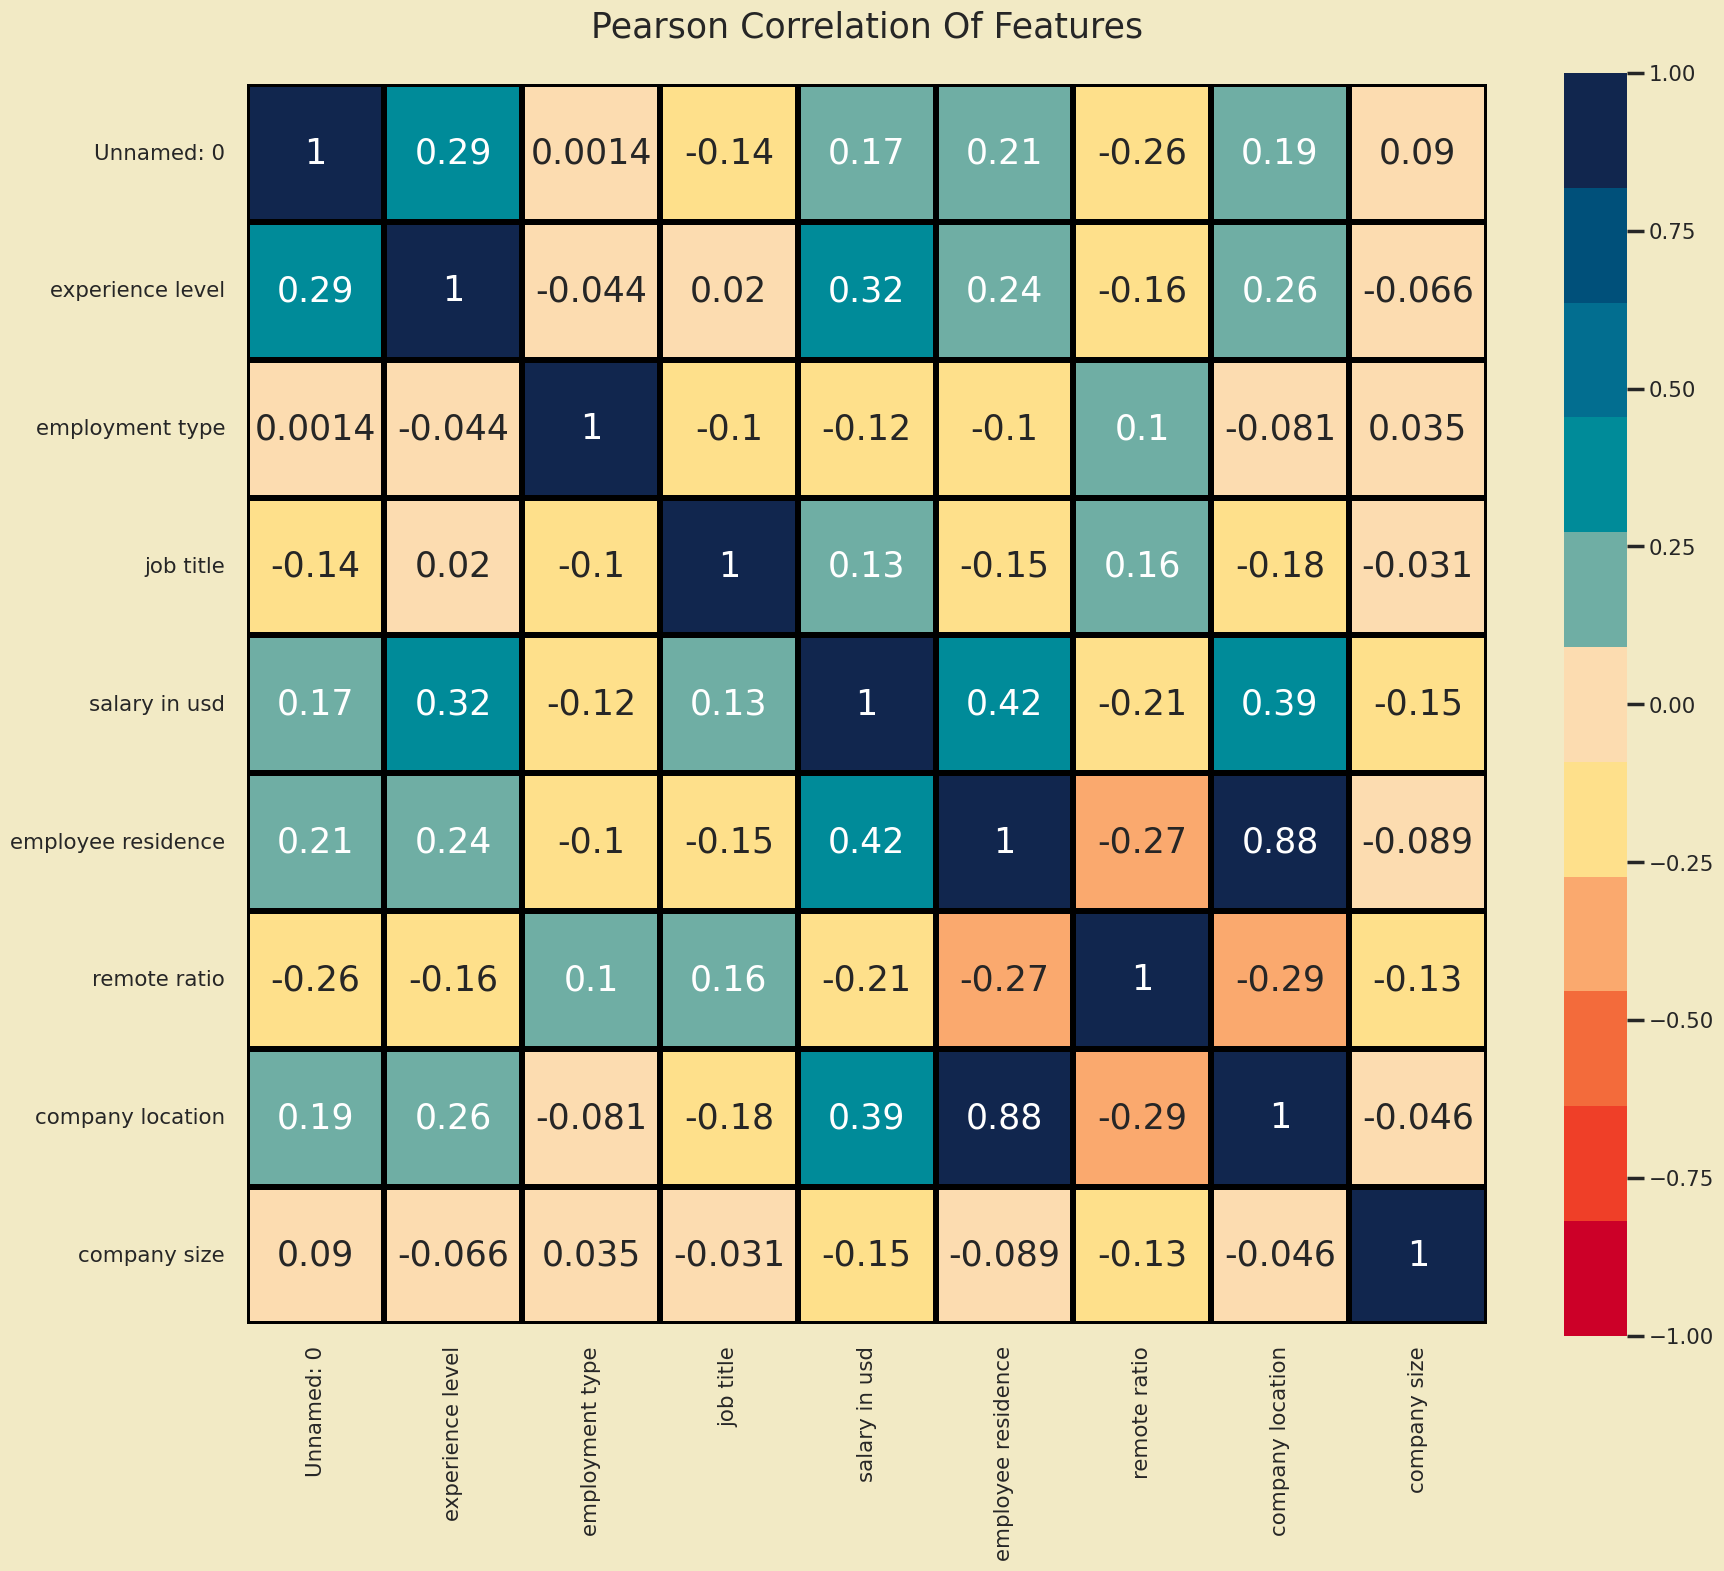

In [33]:
catcol = ["experience level","employment type","job title","employee residence","remote ratio","company location","company size"]
le = LabelEncoder()
for col in catcol:
        data[col] = le.fit_transform(data[col])


plt.subplots(figsize =(20, 20))

sns.heatmap(data.drop("work year",axis=1).corr(), cmap = palette_cmap, square=True, cbar_kws=dict(shrink =.82),
            annot=True, vmin=-1, vmax=1, linewidths=4,linecolor='black',annot_kws=dict(fontsize =25))
plt.title("Pearson Correlation Of Features\n", fontsize=25)
plt.xticks(rotation=90)
plt.show()

# Data Science in Cambodia


In [34]:
data = pd.read_csv("data3.csv")
data.head()

No                                 Job Title    Location Employee Type  \
0   1         Lead analyst and Program mananger  Phnom Penh           NaN   
1   2                        Visiting Professor  Phnom Penh     Part-time   
2   3                         Backend Developer  Phnom Penh     Full-time   
3   4  Back-end Web Developer Quality Assurance  Phnom Penh     Full-time   
4   5      Compliance Data Analytics Specialist  Phnom Penh     Full-time   

  Company Type            Company  \
0      Private      Data Elevates   
1      Private      Search Talent   
2      Private           ABA Bank   
3      Private  CMED Construction   
4      Private           ABA Bank   

                                        Job Function   Job Category  \
0                             Information Technology  Data Analysis   
1                             Education and Training          Other   
2  Information Technology, Product Management, an...          Other   
3                             Information Technology          Other   
4         Analyst, Other, and Information Technology  Data Analysis   

                                             Require  
0  Python, SQL, R, Java, JavaScript, C#, Scala, Bash  
1  Python, R, Matlab, Java, C++, HTML, CSS, JavaS...  
2  Java, Python, JavaScript, C#, Ruby, PHP, Scala...  
3  Python, Selenium, Junit, Postman, HTML, CSS, J...  
4           Excel, Python, R, SQL, Tableau, Power Bi

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   No             134 non-null    int64 
 1   Job Title      134 non-null    object
 2   Location       134 non-null    object
 3   Employee Type  133 non-null    object
 4   Company Type   134 non-null    object
 5   Company        133 non-null    object
 6   Job Function   132 non-null    object
 7   Job Category   134 non-null    object
 8   Require        134 non-null    object
dtypes: int64(1), object(8)
memory usage: 9.5+ KB


In [36]:
import pandas as pd

# Load the dataset
data = pd.read_csv('data3.csv')

# Extract unique skills from the "Require" column
skills = set()
for req in data['Require']:
    if pd.notna(req):
        skills.update(req.split(', '))

# Create binary columns for each skill
for skill in skills:
    data[skill] = data['Require'].apply(lambda x: 1 if pd.notna(x) and skill in x else 0)

# Drop the original "Require" column
data.drop(columns=['Require'], inplace=True)

# Save the updated DataFrame to a new CSV file
data.to_csv('data3_updated.csv', index=False)
data.head()

No                                 Job Title    Location Employee Type  \
0   1         Lead analyst and Program mananger  Phnom Penh           NaN   
1   2                        Visiting Professor  Phnom Penh     Part-time   
2   3                         Backend Developer  Phnom Penh     Full-time   
3   4  Back-end Web Developer Quality Assurance  Phnom Penh     Full-time   
4   5      Compliance Data Analytics Specialist  Phnom Penh     Full-time   

  Company Type            Company  \
0      Private      Data Elevates   
1      Private      Search Talent   
2      Private           ABA Bank   
3      Private  CMED Construction   
4      Private           ABA Bank   

                                        Job Function   Job Category     Zoho  \
0                             Information Technology  Data Analysis  1     0   
1                             Education and Training          Other  1     0   
2  Information Technology, Product Management, an...          Other  1     0   
3                             Information Technology          Other  1     0   
4         Analyst, Other, and Information Technology  Data Analysis  1     0   

   ...  Julia  NetLogo  NoSQL  Selenium  QuickBooks  PostgreSQL  Zoho CRM  \
0  ...      0        0      0         0           0           0         0   
1  ...      0        0      0         0           0           0         0   
2  ...      0        0      1         0           0           0         0   
3  ...      0        0      0         1           0           0         0   
4  ...      0        0      0         0           0           0         0   

   Azure  Power Apps  InVision  
0      0           0         0  
1      0           0         0  
2      0           0         0  
3      0           0         0  
4      0           0         0  

[5 rows x 117 columns]

In [37]:
import pandas as pd

# Load the updated dataset with binary columns
df_updated = pd.read_csv('data3_updated.csv')

# Remove rows with "Other" in the "Job Category" column
df_filtered = df_updated[df_updated['Job Category'] != 'Other']

# Save the filtered DataFrame to a new CSV file
df_filtered.to_csv('data3_filtered.csv', index=False)
df_filtered

No                                 Job Title    Location Employee Type  \
0      1         Lead analyst and Program mananger  Phnom Penh           NaN   
4      5      Compliance Data Analytics Specialist  Phnom Penh     Full-time   
5      6                            Data Scientist  Phnom Penh     Full-time   
6      7                            Data Scientist  Phnom Penh     Full-time   
7      8                            Data Scientist  Phnom Penh     Full-time   
..   ...                                       ...         ...           ...   
128  129  senior Data analyst, Product Analystics   Phnom Penh     Full-time   
129  130                    Senior Data Scientist   Phnom Penh     Full-time   
130  131                         Data Analyst lead  Phnom Penh     Full-time   
131  132           ML/Al - Data Scientist Engineer  Phnom Penh     Full-time   
132  133         Lead Data Infrastructure engineer  Phnom Penh     Full-time   

    Company Type                       Company  \
0        Private                 Data Elevates   
4        Private                      ABA Bank   
5        Private                      ABA Bank   
6        Private                      ABA Bank   
7        Private             CMED Construction   
..           ...                           ...   
128      Private  Aboitiz Data Innovation(ADI)   
129      Private                Braintrust.APJ   
130       Public                Data Elevates    
131      Private                  Smart axiata   
132      Private            Cathay United bank   

                                   Job Function    Job Category  Unnamed: 8  \
0                        Information Technology   Data Analysis           1   
4    Analyst, Other, and Information Technology   Data Analysis           1   
5           Design, Art/Creative, and Marketing  Data Scientist           1   
6           Design, Art/Creative, and Marketing  Data Scientist           1   
7        Engineering and Information Technology  Data Scientist           1   
..                                          ...             ...         ...   
128                                  technology   Data Analysis           1   
129                                  technology  Data Scientist           1   
130                                 technology    Data Analysis           1   
131                           Telecommunication  Data Scientist           1   
132                           Financial Service   Data Engineer           1   

     Zoho  ...  Julia  NetLogo  NoSQL  Selenium  QuickBooks  PostgreSQL  \
0       0  ...      0        0      0         0           0           0   
4       0  ...      0        0      0         0           0           0   
5       0  ...      1        0      0         0           0           0   
6       0  ...      1        0      0         0           0           0   
7       0  ...      1        0      0         0           0           0   
..    ...  ...    ...      ...    ...       ...         ...         ...   
128     0  ...      0        0      0         0           0           0   
129     0  ...      1        0      0         0           0           0   
130     0  ...      0        0      0         0           0           0   
131     0  ...      1        0      0         0           0           0   
132     0  ...      0        0      0         0           0           0   

     Zoho CRM  Azure  Power Apps  InVision  
0           0      0           0         0  
4           0      0           0         0  
5           0      1           0         0  
6           0      1           0         0  
7           0      1           0         0  
..        ...    ...         ...       ...  
128         0      0           0         0  
129         0      1           0         0  
130         0      0           0         0  
131         0      1           0         0  
132         0      0           0         0  

[86 rows x 117 columns]

In [38]:
df_filtered.columns

Index(['No', 'Job Title', 'Location', 'Employee Type', 'Company Type',
       'Company', 'Job Function', 'Job Category', 'Unnamed: 8', 'Zoho',
       ...
       'Julia', 'NetLogo', 'NoSQL', 'Selenium', 'QuickBooks', 'PostgreSQL',
       'Zoho CRM', 'Azure', 'Power Apps', 'InVision'],
      dtype='object', length=117)

In [39]:
import pandas as pd

# Load the filtered dataset
df_filtered = pd.read_csv('data3_filtered.csv')

# Convert the "Location" column to numerical values
df_filtered['Location'] = pd.factorize(df_filtered['Location'])[0]

# Save the updated DataFrame to a new CSV file
df_filtered.to_csv('data3_filtered_numerical.csv', index=False)

In [40]:
columns_to_drop = [ 'Unnamed: 8', 'Jira', 'Trello', 'Asana', 'DevOps', 'Slack', 'Google Workspace', 'Zapier', 'Moodle',   'Google Sheet',  'ERP', 'E-commerce', 'Netsuite', 'Zoho',  'FreshBook', 'Oracle ERP', 'NewSuite', 'Google WorkSpace', 'Zapier', 'Microsoft Power Automate', 'Pardot', 'Marketo']

existing_columns = df_filtered.columns.intersection(columns_to_drop)
df_filtered = df_filtered.drop(existing_columns, axis=1)

In [41]:
df_filtered.head()

No                             Job Title  Location Employee Type  \
0   1     Lead analyst and Program mananger         0           NaN   
1   5  Compliance Data Analytics Specialist         0     Full-time   
2   6                        Data Scientist         0     Full-time   
3   7                        Data Scientist         0     Full-time   
4   8                        Data Scientist         0     Full-time   

  Company Type            Company                                Job Function  \
0      Private      Data Elevates                      Information Technology   
1      Private           ABA Bank  Analyst, Other, and Information Technology   
2      Private           ABA Bank         Design, Art/Creative, and Marketing   
3      Private           ABA Bank         Design, Art/Creative, and Marketing   
4      Private  CMED Construction      Engineering and Information Technology   

     Job Category  ETL  Java  ...  Julia  NetLogo  NoSQL  Selenium  \
0   Data Analysis    0     1  ...      0        0      0         0   
1   Data Analysis    0     0  ...      0        0      0         0   
2  Data Scientist    0     0  ...      1        0      0         0   
3  Data Scientist    0     0  ...      1        0      0         0   
4  Data Scientist    0     0  ...      1        0      0         0   

   QuickBooks  PostgreSQL  Zoho CRM  Azure  Power Apps  InVision  
0           0           0         0      0           0         0  
1           0           0         0      0           0         0  
2           0           0         0      1           0         0  
3           0           0         0      1           0         0  
4           0           0         0      1           0         0  

[5 rows x 97 columns]

In [42]:
df_filtered.isnull().sum()

No               0
Job Title        0
Location         0
Employee Type    1
Company Type     0
                ..
PostgreSQL       0
Zoho CRM         0
Azure            0
Power Apps       0
InVision         0
Length: 97, dtype: int64

In [43]:
# Filling missing values with the most frequent value in each column
df_filtered = df_filtered.apply(lambda x: x.fillna(x.value_counts().index[0]))

# Display the filled DataFrame
df_filtered

No                                 Job Title  Location Employee Type  \
0     1         Lead analyst and Program mananger         0     Full-time   
1     5      Compliance Data Analytics Specialist         0     Full-time   
2     6                            Data Scientist         0     Full-time   
3     7                            Data Scientist         0     Full-time   
4     8                            Data Scientist         0     Full-time   
..  ...                                       ...       ...           ...   
81  129  senior Data analyst, Product Analystics          0     Full-time   
82  130                    Senior Data Scientist          0     Full-time   
83  131                         Data Analyst lead         0     Full-time   
84  132           ML/Al - Data Scientist Engineer         0     Full-time   
85  133         Lead Data Infrastructure engineer         0     Full-time   

   Company Type                       Company  \
0       Private                 Data Elevates   
1       Private                      ABA Bank   
2       Private                      ABA Bank   
3       Private                      ABA Bank   
4       Private             CMED Construction   
..          ...                           ...   
81      Private  Aboitiz Data Innovation(ADI)   
82      Private                Braintrust.APJ   
83       Public                Data Elevates    
84      Private                  Smart axiata   
85      Private            Cathay United bank   

                                  Job Function    Job Category  ETL  Java  \
0                       Information Technology   Data Analysis    0     1   
1   Analyst, Other, and Information Technology   Data Analysis    0     0   
2          Design, Art/Creative, and Marketing  Data Scientist    0     0   
3          Design, Art/Creative, and Marketing  Data Scientist    0     0   
4       Engineering and Information Technology  Data Scientist    0     0   
..                                         ...             ...  ...   ...   
81                                  technology   Data Analysis    0     0   
82                                  technology  Data Scientist    0     0   
83                                 technology    Data Analysis    0     0   
84                           Telecommunication  Data Scientist    0     0   
85                           Financial Service   Data Engineer    1     1   

    ...  Julia  NetLogo  NoSQL  Selenium  QuickBooks  PostgreSQL  Zoho CRM  \
0   ...      0        0      0         0           0           0         0   
1   ...      0        0      0         0           0           0         0   
2   ...      1        0      0         0           0           0         0   
3   ...      1        0      0         0           0           0         0   
4   ...      1        0      0         0           0           0         0   
..  ...    ...      ...    ...       ...         ...         ...       ...   
81  ...      0        0      0         0           0           0         0   
82  ...      1        0      0         0           0           0         0   
83  ...      0        0      0         0           0           0         0   
84  ...      1        0      0         0           0           0         0   
85  ...      0        0      0         0           0           0         0   

    Azure  Power Apps  InVision  
0       0           0         0  
1       0           0         0  
2       1           0         0  
3       1           0         0  
4       1           0         0  
..    ...         ...       ...  
81      0           0         0  
82      1           0         0  
83      0           0         0  
84      1           0         0  
85      0           0         0  

[86 rows x 97 columns]

In [44]:
df_filtered.isnull().sum()

No               0
Job Title        0
Location         0
Employee Type    0
Company Type     0
                ..
PostgreSQL       0
Zoho CRM         0
Azure            0
Power Apps       0
InVision         0
Length: 97, dtype: int64

In [45]:
df_filtered.duplicated().sum()

0

In [46]:
df_filtered = df_filtered.drop_duplicates()
df_filtered.duplicated().sum()


0

In [47]:
print(df_filtered.columns)

Index(['No', 'Job Title', 'Location', 'Employee Type', 'Company Type',
       'Company', 'Job Function', 'Job Category', 'ETL', 'Java', 'No SQL',
       'Apache Spark', 'Marvel', 'Xero,', 'CRM', 'SLS', 'Kotlin', 'Flutter',
       'Dataverse ', 'VB.Net', 'Cornerston', 'OFSAA', ' Flutter', 'Paychex',
       'SAS', 'Google Sheets', 'Sketch', 'MS Office', 'JavaScript',
       'ASP.Net MVC,NUnit ', 'MATLAB', 'EMS', 'Excel', 'CSS', 'Blackboard',
       'Google Clound', 'Dynamic 365', 'Marvel App', 'Matlab', 'Github',
       'Tableua', 'Postman', 'C#', 'MS office', 'Ruby', 'App', 'Bash', 'SAP',
       'HTML', 'PHP', 'AWS', 'Google Date Studio', 'IMF', 'C++', 'Canvas',
       'F#', 'MongoDB', 'ERP,E-commerce ,IMS', 'Tableau', 'PV', 'Figma',
       'MySQL', 'QuickBook', 'Junit', 'Xero', 'Hadoop', 'HubSpot CRM', 'SQL',
       'HRIS', 'Python', 'CDS', 'R', 'Python ', 'NetSuite', 'Zoho,Asana',
       'ADP', 'Power Bi', 'Django', 'SPSS', 'ASP.Net', 'MATLAB,FRED',
       'Apache Kafka', 'Scala', 'GI

In [48]:
df_filtered.shape

(86, 97)

In [49]:
%pip install wordcloud


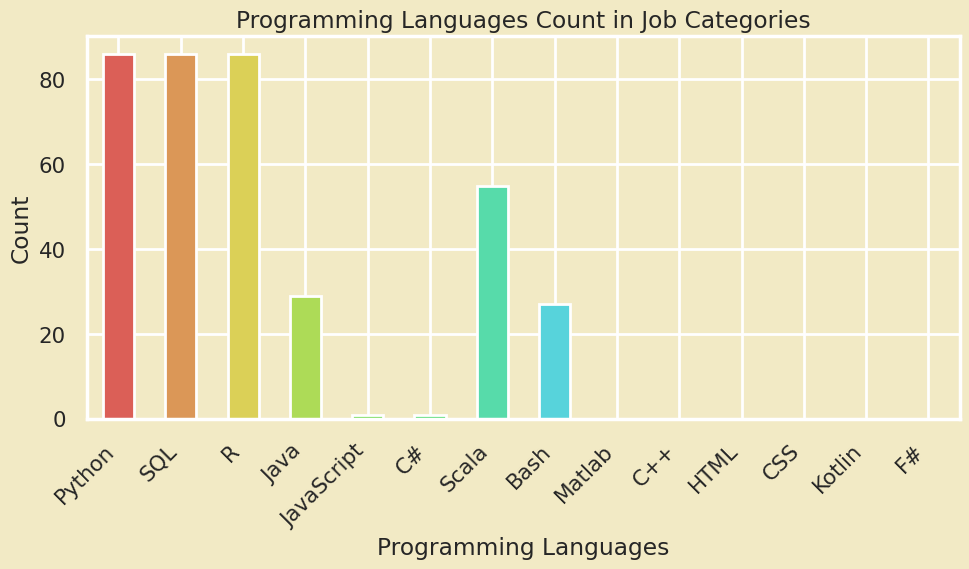

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the filtered dataset
df_filtered = pd.read_csv('data3_filtered.csv')

# Define the Programming Languages
programming_languages = ['Python', 'SQL', 'R', 'Java', 'JavaScript', 'C#', 'Scala', 'Bash', 'Matlab', 'C++', 'HTML', 'CSS', 'Kotlin', 'F#']

# Count the occurrences of each programming language
programming_language_counts = df_filtered[programming_languages].sum()

# Set a color palette for the bars
colors = sns.color_palette('hls', len(programming_languages))

# Plot the bar chart with different colors for each bar
plt.figure(figsize=(10, 6))
programming_language_counts.plot(kind='bar', color=colors)
plt.xlabel('Programming Languages')
plt.ylabel('Count')
plt.title('Programming Languages Count in Job Categories')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [51]:
df_filtered.columns

Index(['No', 'Job Title', 'Location', 'Employee Type', 'Company Type',
       'Company', 'Job Function', 'Job Category', 'Unnamed: 8', 'Zoho',
       ...
       'Julia', 'NetLogo', 'NoSQL', 'Selenium', 'QuickBooks', 'PostgreSQL',
       'Zoho CRM', 'Azure', 'Power Apps', 'InVision'],
      dtype='object', length=117)

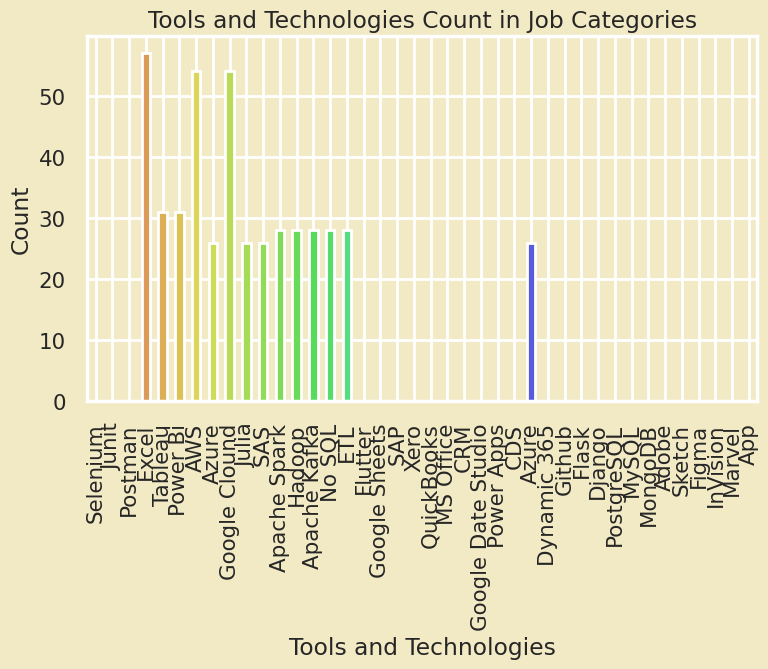

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the filtered dataset
df_filtered = pd.read_csv('data3_filtered.csv')

# Define the Tools and Technologies
tools_technologies = ['Selenium', 'Junit', 'Postman', 'Excel', 'Tableau', 'Power Bi', 'AWS', 'Azure', 'Google Clound', 'Julia', 'SAS', 'Apache Spark', 'Hadoop', 'Apache Kafka', 'No SQL', 'ETL', 'Flutter', 'Google Sheets', 'SAP', 'Xero', 'QuickBooks', 'MS Office', 'CRM', 'Google Date Studio', 'Power Apps', 'CDS', 'Azure', 'Dynamic 365',  'Github', 'Flask', 'Django', 'PostgreSQL', 'MySQL', 'MongoDB', 'Adobe', 'Sketch', 'Figma', 'InVision', 'Marvel', 'App']

# Count the occurrences of each tool or technology
tools_technologies_counts = df_filtered[tools_technologies].sum()

# Set a color palette for the bars
colors = sns.color_palette('hls', len(tools_technologies))

# Plot the bar chart with different colors for each bar
plt.figure(figsize=(8, 7))
tools_technologies_counts.plot(kind='bar', color=colors)
plt.xlabel('Tools and Technologies')
plt.ylabel('Count')
plt.title('Tools and Technologies Count in Job Categories')
plt.xticks(rotation=90, ha='center')
plt.tight_layout()
plt.show()


In [53]:
import pandas as pd
import plotly.express as px

# Load the filtered dataset
df_filtered = pd.read_csv('data3_filtered.csv')

# Define the Tools and Technologies
tools_technologies = ['Selenium', 'Junit', 'Postman', 'Excel', 'Tableau', 'Power Bi', 'AWS', 'Azure', 'Google Clound', 'Julia', 'SAS', 'Apache Spark', 'Hadoop', 'Apache Kafka', 'No SQL', 'ETL', 'Flutter', 'Google Sheets', 'SAP', 'Xero', 'QuickBooks', 'MS Office', 'CRM', 'Google Date Studio', 'Power Apps', 'CDS', 'Azure', 'Dynamic 365',  'Github', 'Flask', 'Django', 'PostgreSQL', 'MySQL', 'MongoDB', 'Adobe', 'Sketch', 'Figma', 'InVision', 'Marvel', 'App']

# Count the occurrences of each tool or technology
tools_technologies_counts = df_filtered[tools_technologies].sum()

# Select the top 10 tools and technologies
top_10_tools_technologies = tools_technologies_counts.nlargest(10)

# Convert the top 10 tools and technologies into a DataFrame for easier plotting
top_10_df = pd.DataFrame(top_10_tools_technologies, columns=['Count'])

# Reset the index to make the tool or technology names accessible as a column
top_10_df.reset_index(inplace=True)

# Rename the columns for clarity in the plot
top_10_df.columns = ['Tool or Technology', 'Count']

# Calculate the percentage for each tool or technology
total_count = top_10_df['Count'].sum()
top_10_df['Percentage'] = (top_10_df['Count'] / total_count) * 100

# Create a bar chart figure using Plotly Express for the top 10 tools and technologies with a dark color palette
fig = px.bar(top_10_df, x='Tool or Technology', y='Count', labels={'x': 'Tools and Technologies', 'y': 'Count'},
             title='Top 10 Tools and Technologies Count in Job Categories', color='Tool or Technology',
             color_discrete_sequence=px.colors.qualitative.Dark24,
             text=top_10_df['Percentage'].apply(lambda x: f'{x:.2f}%'))  # Include percentage text on bars

# Customize the layout
fig.update_traces(textposition='outside')  # Display the text outside the bars

# Show the dashboard
fig.show()


In [54]:
import pandas as pd
import plotly.express as px

# Load the filtered dataset
df_filtered = pd.read_csv('data3_filtered.csv')

# Define the Programming Languages
programming_languages = ['Python', 'SQL', 'R', 'Java', 'JavaScript', 'C#', 'Scala', 'Bash', 'Matlab', 'C++', 'HTML', 'CSS', 'Kotlin', 'F#']

# Count the occurrences of each programming language
programming_languages_counts = df_filtered[programming_languages].sum()

# Select the top 10 programming languages
top_10_programming_languages = programming_languages_counts.nlargest(10)

# Convert the top 10 programming languages into a DataFrame for easier plotting
top_10_df = pd.DataFrame(top_10_programming_languages, columns=['Count'])

# Reset the index to make the programming language names accessible as a column
top_10_df.reset_index(inplace=True)

# Rename the columns for clarity in the plot
top_10_df.columns = ['Programming Language', 'Count']

# Calculate the percentage for each programming language
total_count = top_10_df['Count'].sum()
top_10_df['Percentage'] = (top_10_df['Count'] / total_count) * 100

# Create a bar chart figure using Plotly Express for the top 10 programming languages with a dark color palette
fig = px.bar(top_10_df, x='Programming Language', y='Count', labels={'x': 'Programming Languages', 'y': 'Count'},
             title='Top 10 Programming Languages Count in Job Categories', color='Programming Language',
             color_discrete_sequence=px.colors.qualitative.Dark24,
             text=top_10_df['Percentage'].apply(lambda x: f'{x:.2f}%'))  # Include percentage text on bars

# Customize the layout
fig.update_traces(textposition='outside')  # Display the text outside the bars

# Show the dashboard
fig.show()


In [55]:
%pip install plotly


In [56]:
import plotly.express as px
import pandas as pd

# Assuming df_filtered is your DataFrame with the 'Job Function' column

# Count the occurrences of each job function
job_function_counts = df_filtered['Job Function'].value_counts()

# Select only the top 10 job functions
top_10_job_functions = job_function_counts.head(10)

# Calculate the percentage for each job function
percentage_values = (top_10_job_functions / top_10_job_functions.sum()) * 100

# Create a bar chart figure using Plotly Express with a rainbow color palette
fig = px.bar(x=top_10_job_functions.index, y=top_10_job_functions.values, labels={'x': 'Job Function', 'y': 'Count'}, title='Top 10 Job Functions Count', color_discrete_sequence=px.colors.sequential.Rainbow)

# Add text labels with percentage values to each bar
for i, value in enumerate(top_10_job_functions.values):
    fig.add_annotation(
        x=top_10_job_functions.index[i],
        y=value + 5,  # Adjust the y position of the label
        text=f'{percentage_values.values[i]:.2f}%',  # Format the percentage value
        showarrow=False,
        font=dict(color='white', size=10)  # Customize the font color and size
    )

# Customize the layout
fig.update_layout(
    xaxis_tickangle=-45,
    xaxis_title='Job Function',
    yaxis_title='Count',
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    font=dict(color='white'),
    margin=dict(l=20, r=20, t=40, b=20),
)

# Show the figure
fig.show()


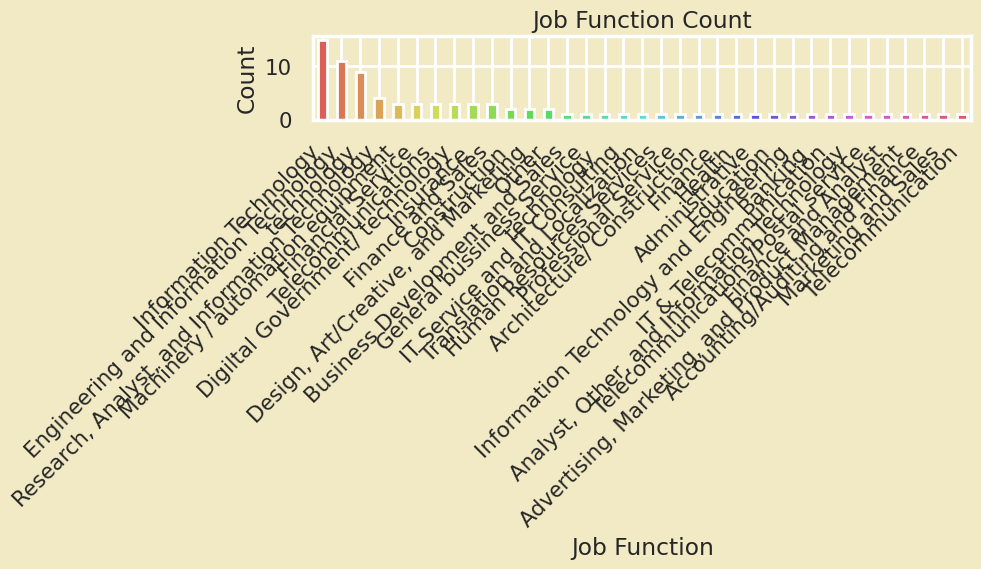

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each job function
job_function_counts = df_filtered['Job Function'].value_counts()

# Set a color palette for the bars
colors = sns.color_palette('hls', len(job_function_counts))

# Plot the bar chart with different colors for each bar
plt.figure(figsize=(10, 6))
job_function_counts.plot(kind='bar', color=colors)
plt.xlabel('Job Function')
plt.ylabel('Count')
plt.title('Job Function Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


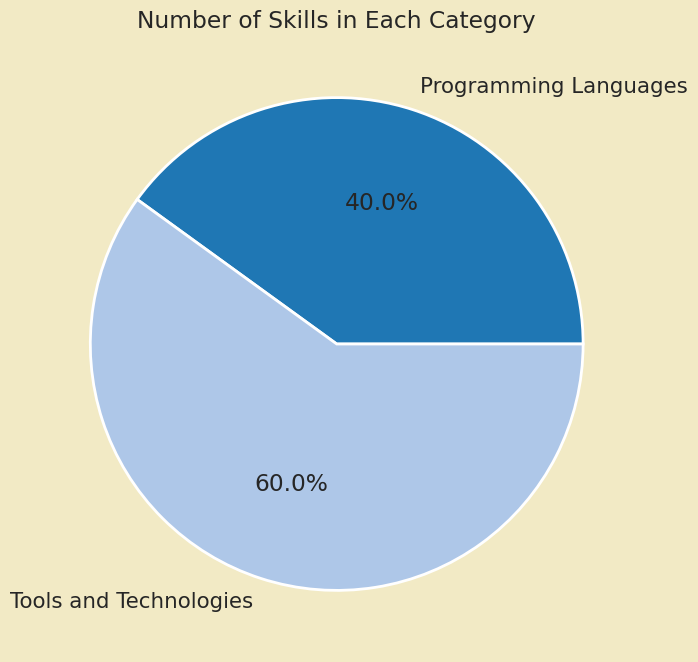

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming df_filtered is your DataFrame containing skills data

# Define the categories dictionary without 'Other'
categories = {
    'Programming Languages': ['Python', 'SQL', 'R', 'Java', 'JavaScript', 'C#', 'Scala', 'Bash', 'Matlab', 'C++', 'HTML', 'CSS', 'Kotlin', 'VB.Net', 'F#'],
    'Tools and Technologies': ['Selenium', 'Junit', 'Postman', 'Excel', 'Tableau', 'Power Bi', 'AWS', 'Azure', 'Google Clound', 'Julia', 'SAS', 'Apache Spark', 'Hadoop', 'Apache Kafka', 'No SQL', 'ETL', 'Flutter', 'Google Sheets', 'Excel', 'SAP', 'Xero', 'QuickBooks', 'MS Office', 'CRM', 'Google Date Studio', 'Power Apps', 'CDS', 'Azure', 'Dynamic 365', 'MS office', 'Github', 'Flask', 'Django', 'PostgreSQL', 'MySQL', 'No SQL', 'MongoDB', 'Adobe', 'Sketch', 'Figma', 'InVision', 'Marvel', 'App'],

}

# Count the number of skills in each category from df_filtered
category_counts = {category: sum(df_filtered[col].sum() for col in skills) for category, skills in categories.items()}

# Create a pie chart with custom colors
plt.figure(figsize=(8, 8))
plt.pie(category_counts.values(), labels=category_counts.keys(), autopct='%1.1f%%', colors=plt.cm.tab20.colors)
plt.title('Number of Skills in Each Category')
plt.show()


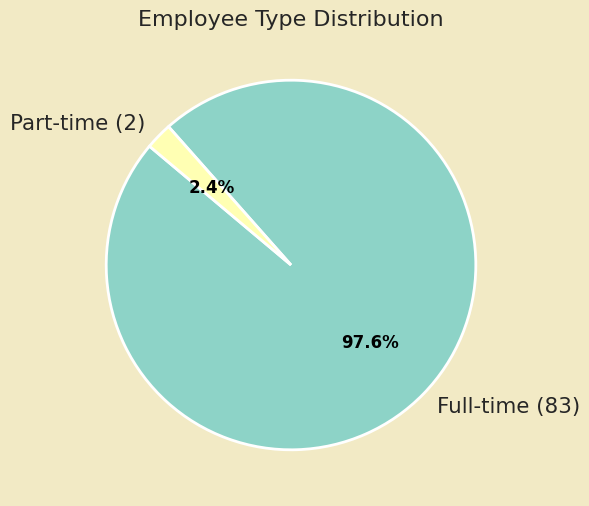

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the filtered dataset
df_filtered = pd.read_csv('data3_filtered.csv')

# Count the occurrences of each Employee Type
employee_type_counts = df_filtered['Employee Type'].value_counts()

# Generate labels with counts
labels = [f"{label} ({count})" for label, count in employee_type_counts.items()]

# Choose a color palette from Color Brewer (Set3)
colors = plt.cm.Set3(range(len(employee_type_counts)))

# Plot a pie chart with custom settings
plt.figure(figsize=(8, 6))  # Set the figure size

# Plot the pie chart
wedges, texts, autotexts = plt.pie(employee_type_counts, labels=labels, autopct='%1.1f%%',
                                    startangle=140, colors=colors)

# Customize text properties
plt.setp(autotexts, size=12, weight='bold', color='black')  # Adjust text color to black for better readability

# Add a title
plt.title('Employee Type Distribution', fontsize=16)

plt.show()


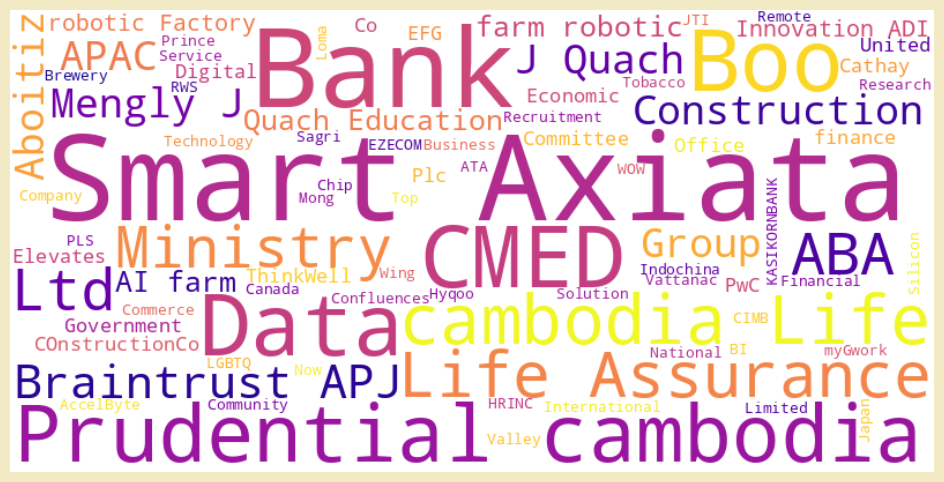

In [60]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all company names into a single string
all_companies = ' '.join(df_filtered['Company'].dropna())

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='plasma')

# Generate the word cloud from the combined company names
wordcloud.generate(all_companies)

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [61]:
import pandas as pd
import plotly.express as px

# Assuming df_filtered is your DataFrame with the 'Company' column

# Count the occurrences of each company
company_counts = df_filtered['Company'].value_counts()

# Select the top 10 companies based on their counts
top_10_companies = company_counts.head(10).reset_index()

# Rename the columns for Plotly Express
top_10_companies.columns = ['Company', 'Frequency']

# Calculate the percentage for each company
total_count = top_10_companies['Frequency'].sum()
top_10_companies['Percentage'] = (top_10_companies['Frequency'] / total_count) * 100

# Create a bar chart figure using Plotly Express with a dark color palette
fig = px.bar(top_10_companies, x='Company', y='Frequency', labels={'Company': 'Company', 'Frequency': 'Frequency'},
             title='Top 10 Companies by Frequency', color='Percentage',
             color_continuous_scale='darkmint')  # Dark color palette

# Customize the layout
fig.update_layout(
    xaxis_title='Company',
    yaxis_title='Frequency',
    font_color='white',  # Set font color to white
    title_font_color='white',  # Set title font color to white
    plot_bgcolor='rgba(0,0,0,0)',  # Set plot background color to transparent
    paper_bgcolor='rgba(0,0,0,0)',  # Set paper background color to transparent
    margin=dict(l=20, r=20, t=40, b=20),
)

# Update the text property of each bar to display the percentage value
fig.update_traces(text=top_10_companies['Percentage'].apply(lambda x: f'{x:.2f}%'), textposition='auto')

# Show the figure
fig.show()

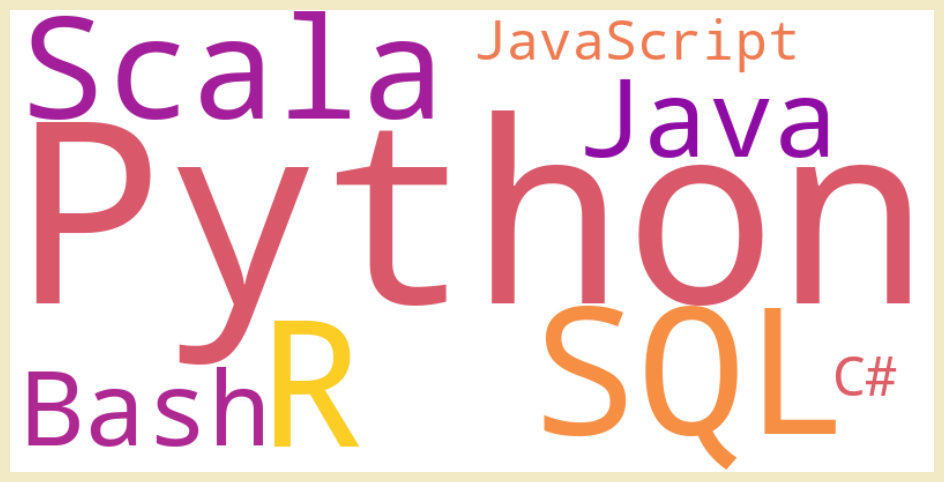

In [62]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Extract the columns containing skills information
skills_columns =  ['Python', 'SQL', 'R', 'Java', 'JavaScript', 'C#', 'Scala', 'Bash', 'Matlab', 'C++', 'HTML', 'CSS', 'Kotlin', 'VB.Net', 'F#']

# Initialize a dictionary to store the frequency of each language
language_frequency = {}
language_frequency = {}

# Iterate over each column and count the frequency of each language
for skill in skills_columns:
    # Extract indices where the skill is present
    indices = df_filtered.index[df_filtered[skill] == 1].tolist()
    # Get the skill name from the column name
    skill_name = skill.replace('_', ' ')  # Replace underscores with spaces
    # Update the language frequency dictionary
    language_frequency[skill_name] = len(indices)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='plasma')

# Generate the word cloud from the language frequency dictionary
wordcloud.generate_from_frequencies(language_frequency)

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

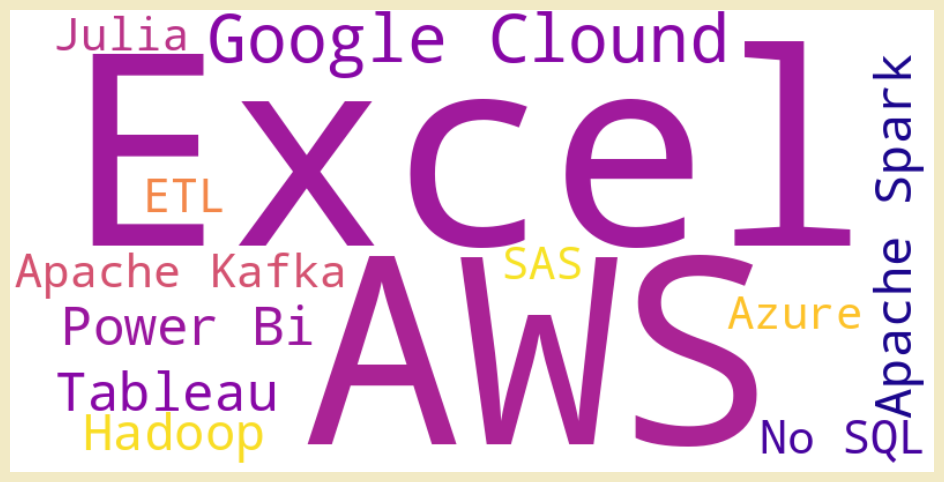

In [63]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Extract the columns containing skills information
skills_columns = ['Selenium', 'Junit', 'Postman', 'Excel', 'Tableau', 'Power Bi', 'AWS', 'Azure', 'Google Clound', 'Julia', 'SAS', 'Apache Spark', 'Hadoop', 'Apache Kafka', 'No SQL', 'ETL', 'Flutter', 'Google Sheets', 'Excel', 'SAP', 'Xero', 'QuickBooks', 'MS Office', 'CRM', 'Google Date Studio', 'Power Apps', 'CDS', 'Azure', 'Dynamic 365', 'MS office', 'Github', 'Flask', 'Django', 'PostgreSQL', 'MySQL', 'No SQL', 'MongoDB', 'Adobe', 'Sketch', 'Figma', 'InVision', 'Marvel', 'App']
# Initialize a dictionary to store the frequency of each language
language_frequency = {}
language_frequency = {}

# Iterate over each column and count the frequency of each language
for skill in skills_columns:
    # Extract indices where the skill is present
    indices = df_filtered.index[df_filtered[skill] == 1].tolist()
    # Get the skill name from the column name
    skill_name = skill.replace('_', ' ')  # Replace underscores with spaces
    # Update the language frequency dictionary
    language_frequency[skill_name] = len(indices)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='plasma')

# Generate the word cloud from the language frequency dictionary
wordcloud.generate_from_frequencies(language_frequency)

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

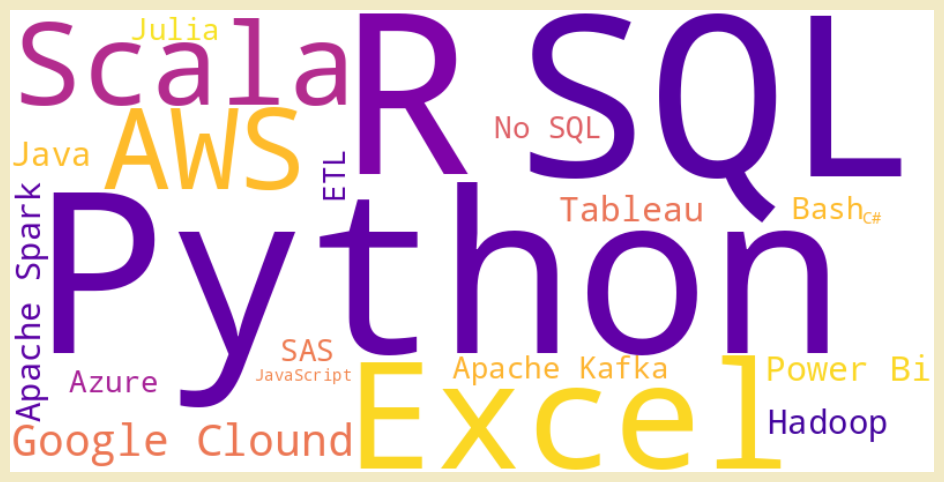

In [64]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Extract the columns containing skills information
skills_columns = ['Selenium', 'Junit', 'Postman', 'Excel', 'Tableau', 'Power Bi', 'AWS', 'Azure', 'Google Clound', 'Julia', 'SAS', 'Apache Spark', 'Hadoop', 'Apache Kafka', 'No SQL', 'ETL', 'Flutter', 'Google Sheets', 'Excel', 'SAP', 'Xero', 'QuickBooks', 'MS Office', 'CRM', 'Google Date Studio', 'Power Apps', 'CDS', 'Azure', 'Dynamic 365', 'MS office', 'Github', 'Flask', 'Django', 'PostgreSQL', 'MySQL', 'No SQL', 'MongoDB', 'Adobe', 'Sketch', 'Figma', 'InVision', 'Marvel', 'App']

# Extract the columns containing programming language skills information
programming_skills_columns =  ['Python', 'SQL', 'R', 'Java', 'JavaScript', 'C#', 'Scala', 'Bash', 'Matlab', 'C++', 'HTML', 'CSS', 'Kotlin', 'VB.Net', 'F#']

# Initialize a dictionary to store the frequency of each skill
skill_frequency = {}

# Iterate over each skill column and count the frequency of each skill
for skill in skills_columns + programming_skills_columns:
    # Extract indices where the skill is present
    indices = df_filtered.index[df_filtered[skill] == 1].tolist()
    # Get the skill name from the column name
    skill_name = skill.replace('_', ' ')  # Replace underscores with spaces
    # Update the skill frequency dictionary
    skill_frequency[skill_name] = len(indices)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='plasma')

# Generate the word cloud from the skill frequency dictionary
wordcloud.generate_from_frequencies(skill_frequency)

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [65]:
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns

# Assuming df_filtered is your DataFrame with the 'Company Type' column

# Calculate the counts for each company type
company_counts = df_filtered['Company Type'].value_counts()

# Create a DataFrame for plotting
company_df = pd.DataFrame({'Company Type': company_counts.index, 'Count': company_counts.values})

# Define a custom color palette
custom_colors = ['rgb(31, 119, 180)', 'rgb(255, 127, 14)', 'rgb(44, 160, 44)',
                 'rgb(214, 39, 40)', 'rgb(148, 103, 189)', 'rgb(140, 86, 75)',
                 'rgb(227, 119, 194)', 'rgb(127, 127, 127)', 'rgb(188, 189, 34)',
                 'rgb(23, 190, 207)']

# Create the bar chart figure using Plotly Express
fig = go.Figure(data=[go.Bar(x=company_df['Company Type'], y=company_df['Count'],
                             marker_color=custom_colors, text=(company_df['Count'] * 100 / company_df['Count'].sum()).round(1).astype(str) + '%')])

# Update the layout
fig.update_layout(title='Company Type Count with Percentage',
                  xaxis_title='Company Type',
                  yaxis_title='Count',
                  plot_bgcolor='rgba(0,0,0,0)',
                  paper_bgcolor='rgba(0,0,0,0)',
                  font=dict(color='white'),
                  title_font_color='white',
                  xaxis_tickangle=-45,
                  bargap=0.2,  # Adjust the gap between bars
                  bargroupgap=0.1,  # Adjust the gap between groups of bars
                  height=600,  # Set the height of the plot
                  margin=dict(l=50, r=50, t=50, b=50))  # Adjust margins as needed

# Show the plot
fig.show()


In [66]:
import pandas as pd
import plotly.express as px

# Assuming df_filtered is your DataFrame with the 'Job Category' column

# Count the occurrences of each job category
job_category_counts = df_filtered['Job Category'].value_counts()

# Select the top 3 job categories
top_3_job_categories = job_category_counts.head(3).reset_index()

# Rename the columns for Plotly Express
top_3_job_categories.columns = ['Job Category', 'Count']

# Calculate the percentage
total_count = top_3_job_categories['Count'].sum()
top_3_job_categories['Percentage'] = (top_3_job_categories['Count'] / total_count) * 100

# Create a bar chart figure using Plotly Express with a dashboard layout
fig = px.bar(top_3_job_categories, x='Job Category', y='Count', labels={'Job Category': 'Job Category', 'Count': 'Count'},
             title='Top 3 Job Categories by Count', color='Job Category')

# Add percentage labels to the bars
for i, row in top_3_job_categories.iterrows():
    fig.add_annotation(x=row['Job Category'], y=row['Count'], text=f'{row["Percentage"]:.2f}%', showarrow=False)

# Customize the layout
fig.update_layout(
    xaxis_title='',
    yaxis_title='Count',
    font=dict(color='black'),
    margin=dict(l=20, r=20, t=40, b=20),
)

# Show the figure
fig.show()


In [67]:
# Assuming df_filtered is your DataFrame containing job categories

# Filter out rows where Job Category is not 'Other'
df_filtered = df_filtered[df_filtered['Job Category'] != 'Other']


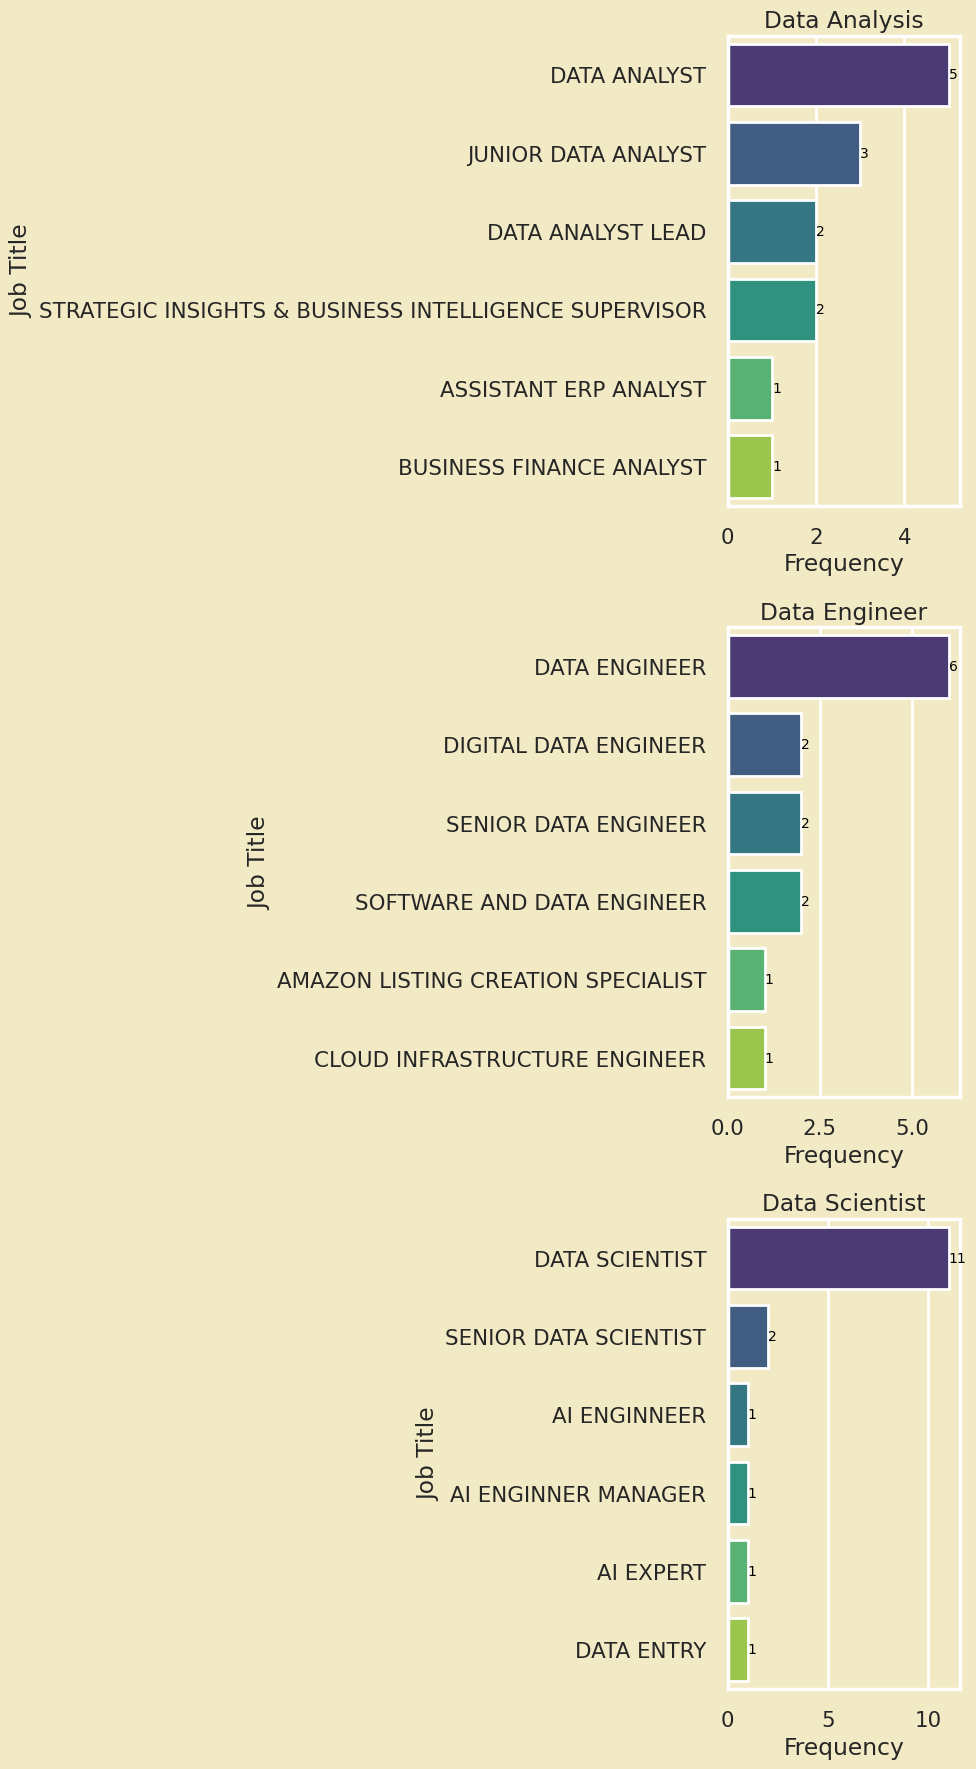

In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_filtered is your DataFrame with columns 'Job Category' and 'Job Title'

# Convert 'Job Title' column to capital letters
df_filtered['Job Title'] = df_filtered['Job Title'].str.upper()

# Group the data by Job Category and Job Title and count the frequency
job_title_counts = df_filtered.groupby(['Job Category', 'Job Title']).size().reset_index(name='Frequency')

# Get the top 5 job titles for each category
top_job_titles = job_title_counts.groupby('Job Category').apply(lambda x: x.nlargest(6, 'Frequency')).reset_index(drop=True)

# Define the list of job categories
job_categories = top_job_titles['Job Category'].unique()

# Filter to show only three job categories
job_categories = job_categories[:3]

# Create subplots for each job category
fig, axs = plt.subplots(len(job_categories), 1, figsize=(10, 6*len(job_categories)))

# Plotting the top 5 job titles for each category
for i, category in enumerate(job_categories):
    ax = axs[i]
    data = top_job_titles[top_job_titles['Job Category'] == category]
    sns.barplot(data=data, x='Frequency', y='Job Title', ax=ax, palette='viridis')
    ax.set_title(category)
    ax.set_xlabel('Frequency')
    ax.set_ylabel('Job Title')

    # Annotate each bar with its frequency value
    for bar in ax.patches:
        ax.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.0f}', ha='left', va='center', color='black', fontsize=10)

plt.tight_layout()
plt.show()


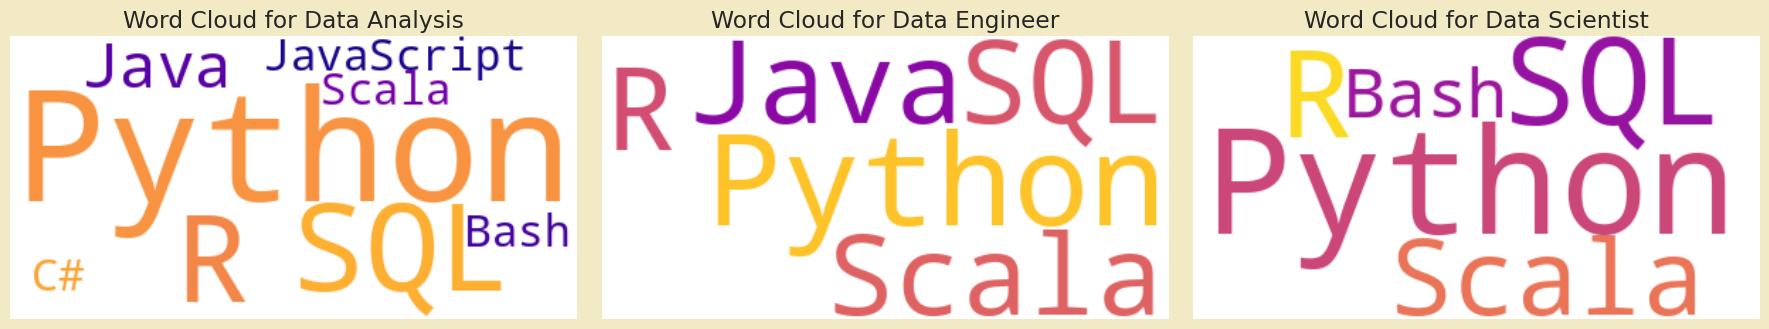

In [69]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter rows where Job Category is not 'Other'
df_filtered = df_filtered[df_filtered['Job Category'] != 'Other']

# Select the top 3 job categories based on frequency
top_job_categories = df_filtered['Job Category'].value_counts().head(3).index.tolist()

# Set up subplots for the top 3 job categories
num_categories = len(top_job_categories)
fig, axes = plt.subplots(1, num_categories, figsize=(18, 6))

# Iterate over each top Job Category
for i, category in enumerate(top_job_categories):
    # Filter the DataFrame based on the Job Category
    filtered_df = df_filtered[df_filtered['Job Category'] == category]

    # Extract the columns containing skills information
    skills_columns = ['Python', 'SQL', 'R', 'Java', 'JavaScript', 'C#', 'Scala', 'Bash', 'Matlab', 'C++', 'HTML', 'CSS', 'Kotlin', 'VB.Net', 'F#']

    # Initialize a dictionary to store the frequency of each skill
    skill_frequency = {}
    # Iterate over each column and count the frequency of each skill
    for skill in skills_columns:
        # Extract indices where the skill is present in the filtered DataFrame
        indices = filtered_df.index[filtered_df[skill] == 1].tolist()
        # Get the skill name from the column name
        skill_name = skill.replace('_', ' ')  # Replace underscores with spaces
        # Update the skill frequency dictionary
        skill_frequency[skill_name] = len(indices)

    # Create a WordCloud object
    wordcloud = WordCloud(width=400, height=200, background_color='white', colormap='plasma')

    # Generate the word cloud from the skill frequency dictionary
    wordcloud.generate_from_frequencies(skill_frequency)

    # Plot the word cloud
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].set_title(f'Word Cloud for {category}')
    axes[i].axis('off')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

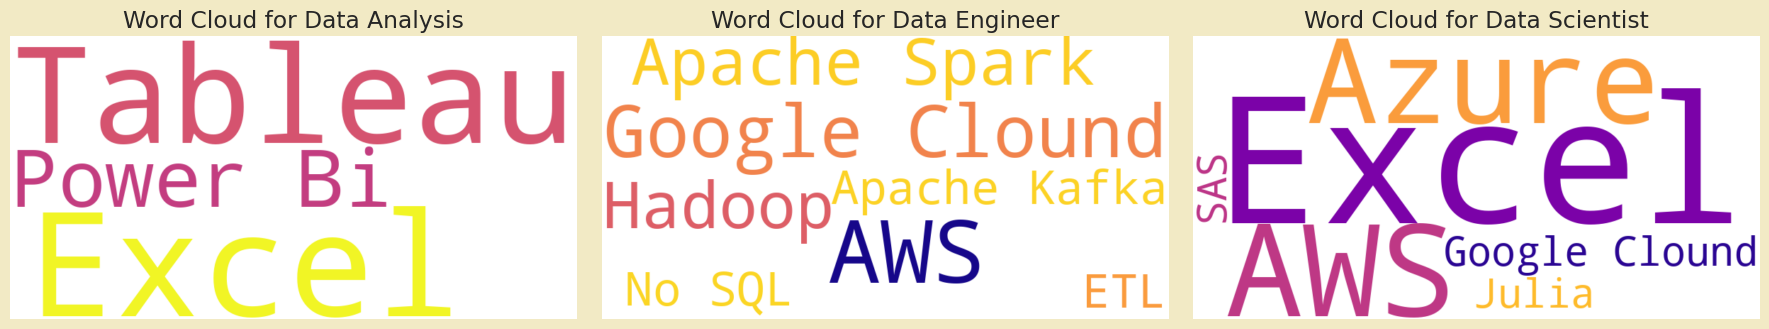

In [70]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter rows where Job Category is not 'Other'
df_filtered = df_filtered[df_filtered['Job Category'] != 'Other']

# Select the top 3 job categories based on frequency
top_job_categories = df_filtered['Job Category'].value_counts().head(3).index.tolist()

# Set up subplots for the top 3 job categories
num_categories = len(top_job_categories)
fig, axes = plt.subplots(1, num_categories, figsize=(18, 6))

# Iterate over each top Job Category
for i, category in enumerate(top_job_categories):
    # Filter the DataFrame based on the Job Category
    filtered_df = df_filtered[df_filtered['Job Category'] == category]

    # Extract the columns containing skills information
    skills_columns = ['Selenium', 'Junit', 'Postman', 'Excel', 'Tableau', 'Power Bi', 'AWS', 'Azure', 'Google Clound', 'Julia', 'SAS', 'Apache Spark', 'Hadoop', 'Apache Kafka', 'No SQL', 'ETL', 'Flutter', 'Google Sheets', 'Excel', 'SAP', 'Xero', 'QuickBooks', 'MS Office', 'CRM', 'Google Date Studio', 'Power Apps', 'CDS', 'Azure', 'Dynamic 365', 'MS office', 'Github', 'Flask', 'Django', 'PostgreSQL', 'MySQL', 'No SQL', 'MongoDB', 'Adobe', 'Sketch', 'Figma', 'InVision', 'Marvel', 'App']

    # Initialize a dictionary to store the frequency of each skill
    skill_frequency = {}
    # Iterate over each column and count the frequency of each skill
    for skill in skills_columns:
        # Extract indices where the skill is present in the filtered DataFrame
        indices = filtered_df.index[filtered_df[skill] == 1].tolist()
        # Get the skill name from the column name
        skill_name = skill.replace('_', ' ')  # Replace underscores with spaces
        # Update the skill frequency dictionary
        skill_frequency[skill_name] = len(indices)

    # Check if skill_frequency is not empty and max_frequency is not zero before generating the word cloud
    if skill_frequency and max(skill_frequency.values()) != 0:
        # Create a WordCloud object
        wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='plasma', max_words=50)

        # Generate the word cloud from the skill frequency dictionary
        wordcloud.generate_from_frequencies(skill_frequency)

        # Plot the word cloud
        axes[i].imshow(wordcloud, interpolation='bilinear')
        axes[i].set_title(f'Word Cloud for {category}')
        axes[i].axis('off')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


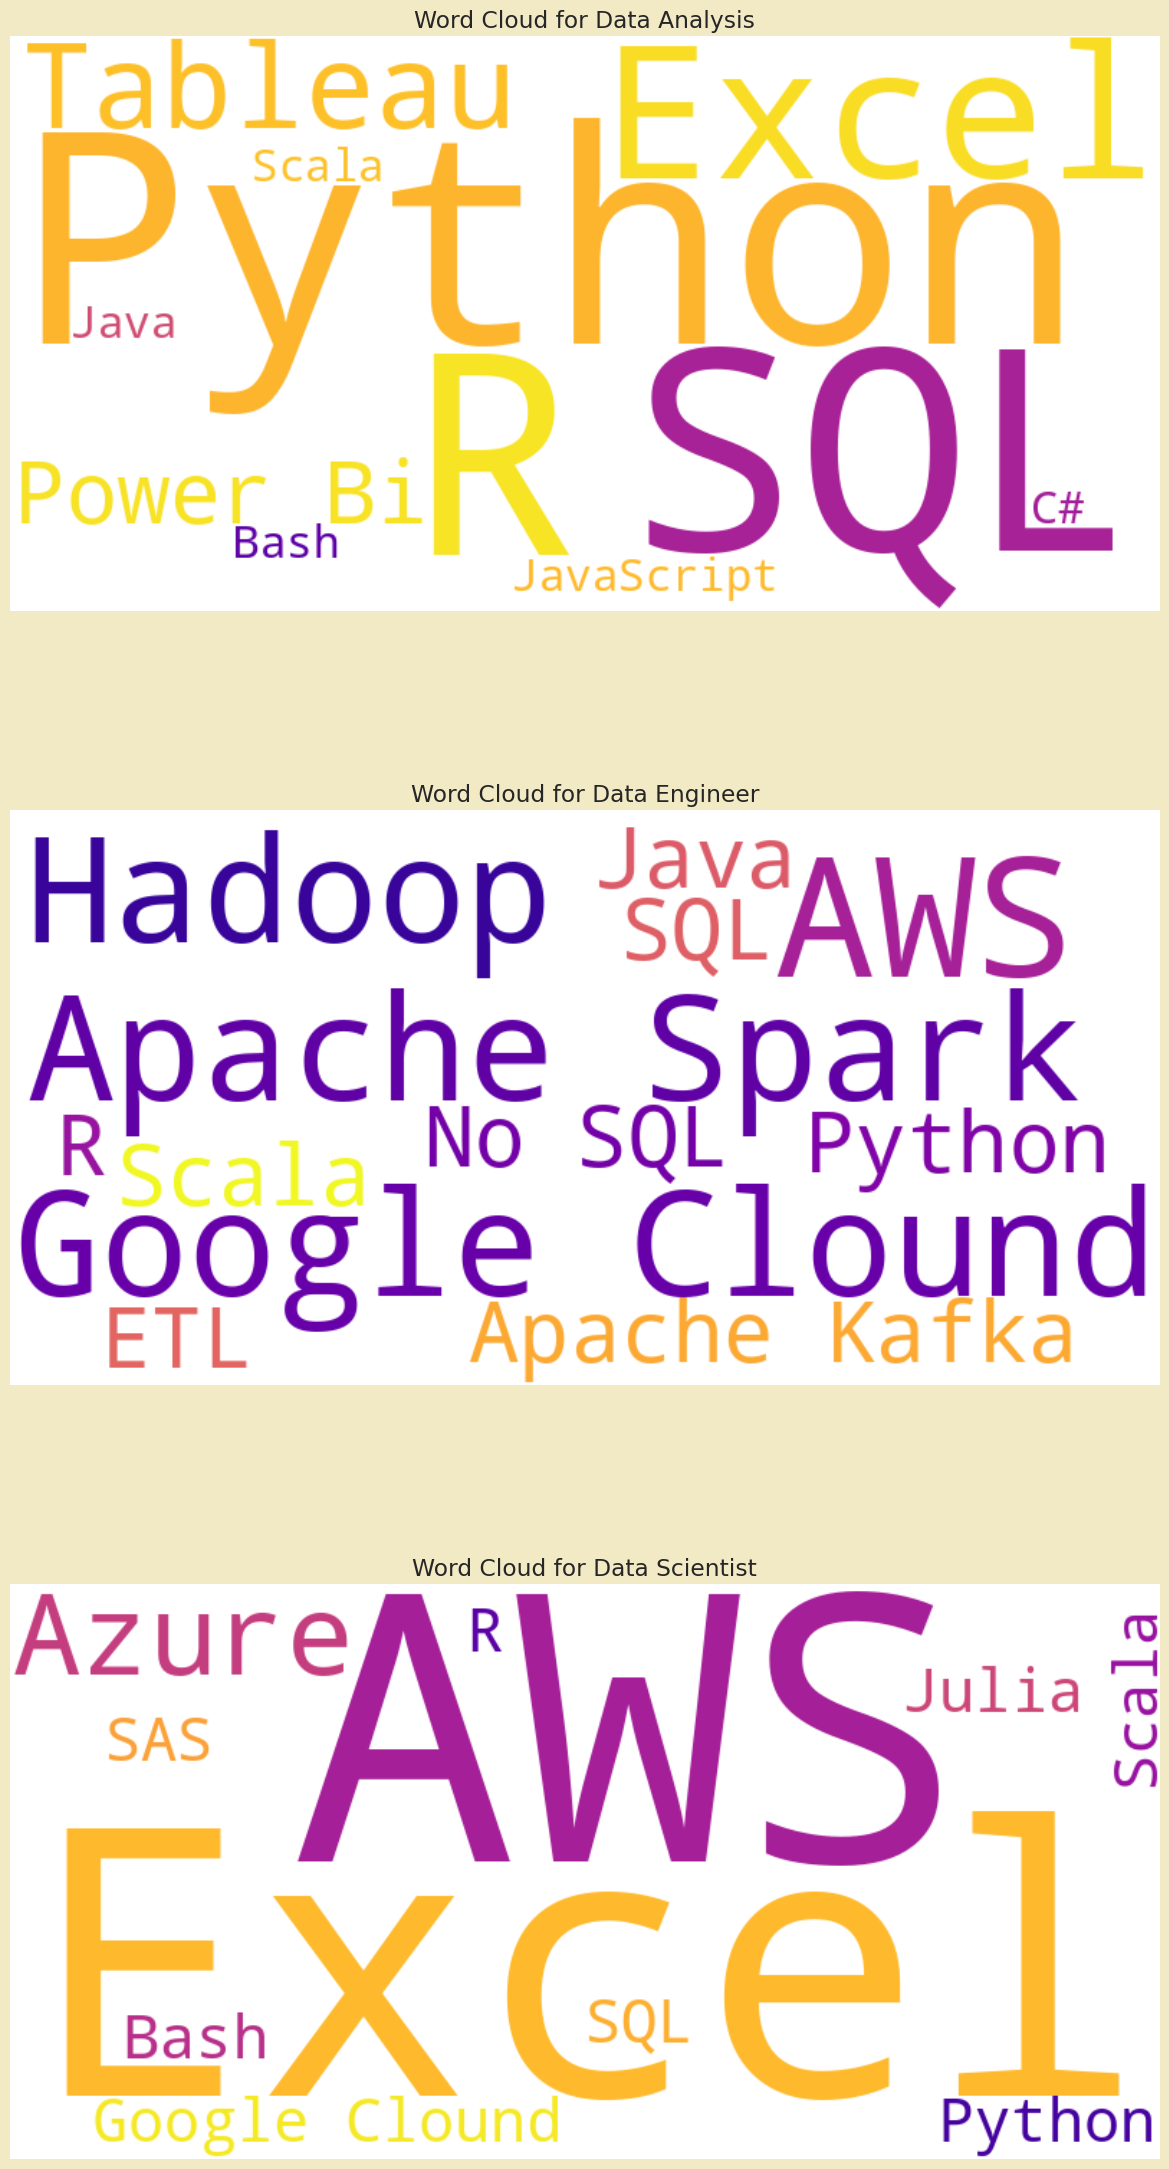

In [71]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter rows where Job Category is not 'Other'
df_filtered = df_filtered[df_filtered['Job Category'] != 'Other']

# Select the top 3 job categories based on frequency
top_job_categories = df_filtered['Job Category'].value_counts().head(3).index.tolist()

# Set up subplots for the top 3 job categories
num_categories = len(top_job_categories)
fig, axes = plt.subplots(num_categories, 1, figsize=(12, 8*num_categories))

# Iterate over each top Job Category
for i, category in enumerate(top_job_categories):
    # Filter the DataFrame based on the Job Category
    filtered_df = df_filtered[df_filtered['Job Category'] == category]

    # Extract the columns containing skills information for both tools and programming languages
    skills_columns = ['Selenium', 'Junit', 'Postman', 'Excel', 'Tableau', 'Power Bi', 'AWS', 'Azure', 'Google Clound', 'Julia', 'SAS', 'Apache Spark', 'Hadoop', 'Apache Kafka', 'No SQL', 'ETL', 'Flutter', 'Google Sheets', 'Excel', 'SAP', 'Xero', 'QuickBooks', 'MS Office', 'CRM', 'Google Date Studio', 'Power Apps', 'CDS', 'Azure', 'Dynamic 365', 'MS office', 'Github', 'Flask', 'Django', 'PostgreSQL', 'MySQL', 'No SQL', 'MongoDB', 'Adobe', 'Sketch', 'Figma', 'InVision', 'Marvel', 'App',
                      'Python', 'SQL', 'R', 'Java', 'JavaScript', 'C#', 'Scala', 'Bash', 'Matlab', 'C++', 'HTML', 'CSS', 'Kotlin', 'VB.Net', 'F#']

    # Initialize a dictionary to store the frequency of each skill
    skill_frequency = {}
    # Iterate over each column and count the frequency of each skill
    for skill in skills_columns:
        # Extract indices where the skill is present in the filtered DataFrame
        indices = filtered_df.index[filtered_df[skill] == 1].tolist()
        # Get the skill name from the column name
        skill_name = skill.replace('_', ' ')  # Replace underscores with spaces
        # Update the skill frequency dictionary
        skill_frequency[skill_name] = len(indices)

    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='plasma')

    # Generate the word cloud from the skill frequency dictionary
    wordcloud.generate_from_frequencies(skill_frequency)

    # Plot the word cloud
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].set_title(f'Word Cloud for {category}')
    axes[i].axis('off')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


In [72]:
%pip install dash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 22.1 MB/s eta 0:00:00


In [86]:
import pandas as pd
import plotly.express as px
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

# Assume df_filtered and job_categories are defined

# Filter the DataFrame to include all three job categories and remove 'Other'
filtered_df = df_filtered[df_filtered['Job Category'] != 'Other']

# Get the unique job categories for the dropdown options
job_categories = filtered_df['Job Category'].unique()

# Initialize the Dash app
app = dash.Dash(__name__)

# Set up the layout
app.layout = html.Div([
    html.H1('Job Category Skills Dashboard'),
    html.Div([
        dcc.Dropdown(
            id='category-dropdown',
            options=[{'label': category, 'value': category} for category in job_categories[:3]],  # Display only the first three job categories
            value=job_categories[0]  # Set default value to the first job category
        )
    ]),
    html.Div([
        dcc.Graph(id='bar-chart')
    ])
])

# Define the callback function
@app.callback(
    Output('bar-chart', 'figure'),
    [Input('category-dropdown', 'value')]
)
def update_bar_chart(selected_category):
    # Filter the DataFrame based on the selected Job Category
    selected_df = filtered_df[filtered_df['Job Category'] == selected_category]

    # Extract the columns containing skills information
    skills_columns = ['Selenium', 'Junit', 'Postman', 'Excel', 'Tableau', 'Power Bi', 'AWS', 'Azure', 'Google Clound', 'Julia', 'SAS', 'Apache Spark', 'Hadoop', 'Apache Kafka', 'No SQL', 'ETL', 'Flutter', 'Google Sheets', 'Excel', 'SAP', 'Xero', 'QuickBooks', 'MS Office', 'CRM', 'Google Date Studio', 'Power Apps', 'CDS', 'Azure', 'Dynamic 365', 'MS office', 'Github', 'Flask', 'Django', 'PostgreSQL', 'MySQL', 'No SQL', 'MongoDB', 'Adobe', 'Sketch', 'Figma', 'InVision', 'Marvel', 'App']

    # Initialize a dictionary to store the frequency of each skill
    skill_frequency = {}

    # Iterate over each column and count the frequency of each skill
    for skill in skills_columns:
        # Extract indices where the skill is present in the selected DataFrame
        indices = selected_df.index[selected_df[skill] == 1].tolist()
        # Get the skill name from the column name
        skill_name = skill.replace('_', ' ')  # Replace underscores with spaces
        # Update the skill frequency dictionary
        skill_frequency[skill_name] = len(indices)

    # Sort the skill frequency dictionary by values in descending order
    sorted_skills = sorted(skill_frequency.items(), key=lambda x: x[1], reverse=True)[:8]
    skills, frequencies = zip(*sorted_skills)

    # Calculate percentages
    total = sum(frequencies)
    percentages = [(freq / total) * 100 for freq in frequencies]

    # Create the bar chart figure using Plotly Express with a dark color scheme
    fig = px.bar(x=skills, y=percentages, color=skills, color_discrete_sequence=px.colors.qualitative.Dark24, text=percentages)

    # Update the layout properties
    fig.update_layout(title=f'Top 8 Skills Percentage for {selected_category}',
                      xaxis=dict(title='Skills'),
                      yaxis=dict(title='Percentage'))

    # Update the text formatting for percentage display
    fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')

    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

In [88]:
import pandas as pd
import plotly.express as px
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

# Assume df_filtered and job_categories are defined

# Filter the DataFrame to include all three job categories and remove 'Other'
filtered_df = df_filtered[df_filtered['Job Category'] != 'Other']

# Get the unique job categories for the dropdown options
job_categories = filtered_df['Job Category'].unique()

# Initialize the Dash app
app = dash.Dash(__name__)

# Set up the layout
app.layout = html.Div([
    html.H1('Job Category Skills Dashboard'),
    html.Div([
        dcc.Dropdown(
            id='category-dropdown',
            options=[{'label': category, 'value': category} for category in job_categories[:3]],  # Display only the first three job categories
            value=job_categories[0]  # Set default value to the first job category
        )
    ]),
    html.Div([
        dcc.Graph(id='bar-chart')
    ])
])

# Define the callback function
@app.callback(
    Output('bar-chart', 'figure'),
    [Input('category-dropdown', 'value')]
)
def update_bar_chart(selected_category):
    # Filter the DataFrame based on the selected Job Category
    selected_df = filtered_df[filtered_df['Job Category'] == selected_category]

    # Extract the columns containing skills information
    skills_columns = ['Python', 'SQL', 'R', 'Java', 'JavaScript', 'C#', 'Scala', 'Bash', 'Matlab',
                      'C++', 'HTML', 'CSS', 'Kotlin', 'VB.Net', 'F#']

    # Initialize a dictionary to store the frequency of each skill
    skill_frequency = {}

    # Iterate over each column and count the frequency of each skill
    for skill in skills_columns:
        # Extract indices where the skill is present in the selected DataFrame
        indices = selected_df.index[selected_df[skill] == 1].tolist()
        # Get the skill name from the column name
        skill_name = skill.replace('_', ' ')  # Replace underscores with spaces
        # Update the skill frequency dictionary
        skill_frequency[skill_name] = len(indices)

    # Sort the skill frequency dictionary by values in descending order
    sorted_skills = sorted(skill_frequency.items(), key=lambda x: x[1], reverse=True)[:8]
    skills, frequencies = zip(*sorted_skills)

    # Calculate percentages directly from frequencies
    total_skills = sum(frequencies)
    percentages = [(freq / total_skills) * 100 for freq in frequencies]

    # Create the bar chart figure using Plotly Express with a dark color scheme
    fig = px.bar(x=skills, y=percentages, color=skills, color_discrete_sequence=px.colors.qualitative.Dark24, text=percentages)

    # Update the layout properties
    fig.update_layout(title=f'Top 8 Skills Percentage for {selected_category}',
                      xaxis=dict(title='Skills'),
                      yaxis=dict(title='Percentage'))

    # Update the text formatting for percentage display
    fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')

    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

# Machine Learning



**Prediction Include  relevant Major**

In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import precision_recall_fscore_support

# Load the updated dataset with binary columns
df_updated = pd.read_csv('data3_updated.csv')

# Remove rows with "Other" in the "Job Category" column
df_filtered = df_updated[df_updated['Job Category'] != 'Other']

# Save the filtered DataFrame to a new CSV file
df_filtered.to_csv('data3_filtered.csv', index=False)

# Load the dataset
data = df_filtered  # Use the filtered DataFrame

# Extract features and target variable
X = data.drop(columns=['No', 'Job Title', 'Location', 'Employee Type', 'Company Type', 'Company', 'Job Function', 'Job Category'])
y = data['Job Title']

# Preprocess the dataset
data.dropna(inplace=True)
data = data.astype('category')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values in the input data
imputer = SimpleImputer(strategy='most_frequent')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initialize the OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')

# Fit and transform the categorical columns in X_train_imputed
X_train_encoded = encoder.fit_transform(X_train_imputed)

# Initialize and train the RandomForestClassifier model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_encoded, y_train)

# Transform the categorical columns in X_test_imputed
X_test_encoded = encoder.transform(X_test_imputed)

# Evaluate the model's performance on the testing data
y_pred = model.predict(X_test_encoded)

# Generate the classification report
report = classification_report(y_test, y_pred)

# Display the classification report
print("Classification Report:")
print(report)

# Get precision, recall, and F1-score for each job title
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, labels=model.classes_)

# Create a DataFrame to store metrics
metrics_df = pd.DataFrame({
    'Job Title': model.classes_,
    'Precision': precision,
    'Recall': recall,
    'F1-score': f1
})

# Define weights for precision, recall, and F1-score
weights = {'Precision': 0.3, 'Recall': 0.5, 'F1-score': 0.2}

# Calculate custom score based on weighted metrics
metrics_df['Custom Score'] = (metrics_df['Precision'] * weights['Precision'] +
                              metrics_df['Recall'] * weights['Recall'] +
                              metrics_df['F1-score'] * weights['F1-score'])

# Define threshold to filter out job titles with low custom score
threshold = 0.6

# Filter out job titles with low custom score
filtered_df = metrics_df[metrics_df['Custom Score'] > threshold]

# Sort the remaining job titles by custom score
sorted_df = filtered_df.sort_values(by='Custom Score', ascending=False)

# Get the top three suggested job titles
top_three_jobs = sorted_df['Job Title'].head(2).tolist()

# Display the top three suggested job titles
print("\nThe top suggested job titles based on custom scoring are:")
for job_title in top_three_jobs:
    print(job_title)


Classification Report:
                                    precision    recall  f1-score   support

      Bussiness Analyst Supervisor       0.00      0.00      0.00         1
                      Data Analyst       0.50      1.00      0.67         1
                     Data Engineer       0.11      1.00      0.20         1
                        Data Entry       0.00      0.00      0.00         1
                    Data Scientist       0.57      1.00      0.73         4
     Data Specialist for Ai models       0.00      0.00      0.00         1
             Digital data Engineer       0.00      0.00      0.00         2
         Engineer, Cloud Solutions       0.00      0.00      0.00         1
             Junior Data Scientist       0.00      0.00      0.00         1
 Lead analyst and Program mananger       0.00      0.00      0.00         1
              Performance Engineer       0.00      0.00      0.00         1
              Senior data Engineer       0.00      0.00      0.0

In [77]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import precision_recall_fscore_support

# Load the updated dataset with binary columns
df_updated = pd.read_csv('data3_updated.csv')

# Remove rows with "Other" in the "Job Category" column
df_filtered = df_updated[df_updated['Job Category'] != 'Other']

# Save the filtered DataFrame to a new CSV file
df_filtered.to_csv('data3_filtered.csv', index=False)

# Load the dataset
data = df_filtered  # Use the filtered DataFrame

# Extract features and target variable
X = data.drop(columns=['No', 'Job Title', 'Location', 'Employee Type', 'Company Type', 'Company', 'Job Function', 'Job Category'])
y = data['Job Title']

# Preprocess the dataset
data.dropna(inplace=True)
data = data.astype('category')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values in the input data
imputer = SimpleImputer(strategy='most_frequent')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initialize the OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')

# Fit and transform the categorical columns in X_train_imputed
X_train_encoded = encoder.fit_transform(X_train_imputed)

# Initialize and train the SVC (Support Vector Classifier) model
model = SVC(random_state=42)
model.fit(X_train_encoded, y_train)

# Transform the categorical columns in X_test_imputed
X_test_encoded = encoder.transform(X_test_imputed)

# Evaluate the model's performance on the testing data
y_pred = model.predict(X_test_encoded)

# Generate the classification report
report = classification_report(y_test, y_pred)

# Display the classification report
print("Classification Report:")
print(report)

# Get precision, recall, and F1-score for each job title
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, labels=model.classes_)

# Create a DataFrame to store metrics
metrics_df = pd.DataFrame({
    'Job Title': model.classes_,
    'Precision': precision,
    'Recall': recall,
    'F1-score': f1
})

# Define weights for precision, recall, and F1-score
weights = {'Precision': 0.3, 'Recall': 0.5, 'F1-score': 0.2}

# Calculate custom score based on weighted metrics
metrics_df['Custom Score'] = (metrics_df['Precision'] * weights['Precision'] +
                              metrics_df['Recall'] * weights['Recall'] +
                              metrics_df['F1-score'] * weights['F1-score'])

# Define threshold to filter out job titles with low custom score
threshold = 0.6

# Filter out job titles with low custom score
filtered_df = metrics_df[metrics_df['Custom Score'] > threshold]

# Sort the remaining job titles by custom score
sorted_df = filtered_df.sort_values(by='Custom Score', ascending=False)

# Get the top three suggested job titles
top_three_jobs = sorted_df['Job Title'].head(3).tolist()

# Display the top three suggested job titles
print("\nThe top  suggested job titles based on custom scoring are:")
for job_title in top_three_jobs:
    print(job_title)


Classification Report:
                                    precision    recall  f1-score   support

      Bussiness Analyst Supervisor       0.00      0.00      0.00         1
                      Data Analyst       0.33      1.00      0.50         1
                     Data Engineer       0.12      1.00      0.22         1
                        Data Entry       0.00      0.00      0.00         1
                    Data Scientist       0.57      1.00      0.73         4
     Data Specialist for Ai models       0.00      0.00      0.00         1
             Digital data Engineer       0.00      0.00      0.00         2
         Engineer, Cloud Solutions       0.00      0.00      0.00         1
             Junior Data Scientist       0.00      0.00      0.00         1
 Lead analyst and Program mananger       0.00      0.00      0.00         1
              Performance Engineer       0.00      0.00      0.00         1
              Senior data Engineer       0.00      0.00      0.0

In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import precision_recall_fscore_support

# Load the updated dataset with binary columns
df_updated = pd.read_csv('data3_updated.csv')

# Remove rows with "Other" in the "Job Category" column
df_filtered = df_updated[df_updated['Job Category'] != 'Other']

# Save the filtered DataFrame to a new CSV file
df_filtered.to_csv('data3_filtered.csv', index=False)

# Load the dataset
data = df_filtered  # Use the filtered DataFrame

# Extract features and target variable
X = data.drop(columns=['No', 'Job Title', 'Location', 'Employee Type', 'Company Type', 'Company', 'Job Function', 'Job Category'])
y = data['Job Title']

# Preprocess the dataset
data.dropna(inplace=True)
data = data.astype('category')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values in the input data
imputer = SimpleImputer(strategy='most_frequent')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initialize the OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')

# Fit and transform the categorical columns in X_train_imputed
X_train_encoded = encoder.fit_transform(X_train_imputed)

# Initialize and train the DecisionTreeClassifier model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_encoded, y_train)

# Transform the categorical columns in X_test_imputed
X_test_encoded = encoder.transform(X_test_imputed)

# Evaluate the model's performance on the testing data
y_pred = model.predict(X_test_encoded)

# Generate the classification report
report = classification_report(y_test, y_pred)

# Display the classification report
print("Classification Report:")
print(report)

# Get precision, recall, and F1-score for each job title
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, labels=model.classes_)

# Create a DataFrame to store metrics
metrics_df = pd.DataFrame({
    'Job Title': model.classes_,
    'Precision': precision,
    'Recall': recall,
    'F1-score': f1
})

# Define weights for precision, recall, and F1-score
weights = {'Precision': 0.3, 'Recall': 0.5, 'F1-score': 0.2}

# Calculate custom score based on weighted metrics
metrics_df['Custom Score'] = (metrics_df['Precision'] * weights['Precision'] +
                              metrics_df['Recall'] * weights['Recall'] +
                              metrics_df['F1-score'] * weights['F1-score'])

# Define threshold to filter out job titles with low custom score
threshold = 0.6

# Filter out job titles with low custom score
filtered_df = metrics_df[metrics_df['Custom Score'] > threshold]

# Sort the remaining job titles by custom score
sorted_df = filtered_df.sort_values(by='Custom Score', ascending=False)

# Get the top three suggested job titles
top_three_jobs = sorted_df['Job Title'].head(3).tolist()

# Display the top three suggested job titles
print("\nThe top  suggested job titles based on custom scoring are:")
for job_title in top_three_jobs:
    print(job_title)


Classification Report:
                                    precision    recall  f1-score   support

      Bussiness Analyst Supervisor       0.00      0.00      0.00         1
                      Data Analyst       0.33      1.00      0.50         1
                     Data Engineer       0.12      1.00      0.22         1
                        Data Entry       0.00      0.00      0.00         1
                    Data Scientist       0.57      1.00      0.73         4
     Data Specialist for Ai models       0.00      0.00      0.00         1
             Digital data Engineer       0.00      0.00      0.00         2
         Engineer, Cloud Solutions       0.00      0.00      0.00         1
             Junior Data Scientist       0.00      0.00      0.00         1
 Lead analyst and Program mananger       0.00      0.00      0.00         1
              Performance Engineer       0.00      0.00      0.00         1
              Senior data Engineer       0.00      0.00      0.0

In [80]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import precision_recall_fscore_support

# Load the updated dataset with binary columns
df_updated = pd.read_csv('data3_updated.csv')

# Remove rows with "Other" in the "Job Category" column
df_filtered = df_updated[df_updated['Job Category'] != 'Other']

# Save the filtered DataFrame to a new CSV file
df_filtered.to_csv('data3_filtered.csv', index=False)

# Load the dataset
data = df_filtered  # Use the filtered DataFrame

# Extract features and target variable
X = data.drop(columns=['No', 'Job Title', 'Location', 'Employee Type', 'Company Type', 'Company', 'Job Function', 'Job Category'])
y = data['Job Title']

# Preprocess the dataset
data.dropna(inplace=True)
data = data.astype('category')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values in the input data
imputer = SimpleImputer(strategy='most_frequent')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initialize the OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')

# Fit and transform the categorical columns in X_train_imputed
X_train_encoded = encoder.fit_transform(X_train_imputed)

# Transform the categorical columns in X_test_imputed
X_test_encoded = encoder.transform(X_test_imputed)

# Initialize and train the LogisticRegression model
model = LogisticRegression(random_state=42, multi_class='multinomial', solver='lbfgs')
model.fit(X_train_encoded, y_train)

# Evaluate the model's performance on the testing data
y_pred = model.predict(X_test_encoded)

# Generate the classification report
report = classification_report(y_test, y_pred)

# Display the classification report
print("Classification Report:")
print(report)

# Get precision, recall, and F1-score for each job title
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, labels=model.classes_)

# Create a DataFrame to store metrics
metrics_df = pd.DataFrame({
    'Job Title': model.classes_,
    'Precision': precision,
    'Recall': recall,
    'F1-score': f1
})

# Define weights for precision, recall, and F1-score
weights = {'Precision': 0.3, 'Recall': 0.5, 'F1-score': 0.2}

# Calculate custom score based on weighted metrics
metrics_df['Custom Score'] = (metrics_df['Precision'] * weights['Precision'] +
                              metrics_df['Recall'] * weights['Recall'] +
                              metrics_df['F1-score'] * weights['F1-score'])

# Define threshold to filter out job titles with low custom score
threshold = 0.6

# Filter out job titles with low custom score
filtered_df = metrics_df[metrics_df['Custom Score'] > threshold]

# Sort the remaining job titles by custom score
sorted_df = filtered_df.sort_values(by='Custom Score', ascending=False)

# Get the top three suggested job titles
top_three_jobs = sorted_df['Job Title'].head(3).tolist()

# Display the top three suggested job titles
print("\nThe top suggested job titles based on custom scoring are:")
for job_title in top_three_jobs:
    print(job_title)

Classification Report:
                                    precision    recall  f1-score   support

      Bussiness Analyst Supervisor       0.00      0.00      0.00         1
                      Data Analyst       0.33      1.00      0.50         1
                     Data Engineer       0.12      1.00      0.22         1
                        Data Entry       0.00      0.00      0.00         1
                    Data Scientist       0.57      1.00      0.73         4
     Data Specialist for Ai models       0.00      0.00      0.00         1
             Digital data Engineer       0.00      0.00      0.00         2
         Engineer, Cloud Solutions       0.00      0.00      0.00         1
             Junior Data Scientist       0.00      0.00      0.00         1
 Lead analyst and Program mananger       0.00      0.00      0.00         1
              Performance Engineer       0.00      0.00      0.00         1
              Senior data Engineer       0.00      0.00      0.0

In [81]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import precision_recall_fscore_support

# Load the updated dataset with binary columns
df_updated = pd.read_csv('data3_updated.csv')

# Remove rows with "Other" in the "Job Category" column
df_filtered = df_updated[df_updated['Job Category'] != 'Other']

# Save the filtered DataFrame to a new CSV file
df_filtered.to_csv('data3_filtered.csv', index=False)

# Load the dataset
data = df_filtered  # Use the filtered DataFrame

# Extract features and target variable
X = data.drop(columns=['No', 'Job Title', 'Location', 'Employee Type', 'Company Type', 'Company', 'Job Function', 'Job Category'])
y = data['Job Title']

# Preprocess the dataset
data.dropna(inplace=True)
data = data.astype('category')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values in the input data
imputer = SimpleImputer(strategy='most_frequent')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initialize the OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')

# Fit and transform the categorical columns in X_train_imputed
X_train_encoded = encoder.fit_transform(X_train_imputed)

# Initialize and train the MLPClassifier model
model = MLPClassifier(random_state=42)
model.fit(X_train_encoded, y_train)

# Transform the categorical columns in X_test_imputed
X_test_encoded = encoder.transform(X_test_imputed)

# Evaluate the model's performance on the testing data
y_pred = model.predict(X_test_encoded)

# Generate the classification report
report = classification_report(y_test, y_pred)

# Display the classification report
print("Classification Report:")
print(report)

# Get precision, recall, and F1-score for each job title
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, labels=model.classes_)

# Create a DataFrame to store metrics
metrics_df = pd.DataFrame({
    'Job Title': model.classes_,
    'Precision': precision,
    'Recall': recall,
    'F1-score': f1
})

# Define weights for precision, recall, and F1-score
weights = {'Precision': 0.3, 'Recall': 0.5, 'F1-score': 0.2}

# Calculate custom score based on weighted metrics
metrics_df['Custom Score'] = (metrics_df['Precision'] * weights['Precision'] +
                              metrics_df['Recall'] * weights['Recall'] +
                              metrics_df['F1-score'] * weights['F1-score'])

# Define threshold to filter out job titles with low custom score
threshold = 0.6

# Filter out job titles with low custom score
filtered_df = metrics_df[metrics_df['Custom Score'] > threshold]

# Sort the remaining job titles by custom score
sorted_df = filtered_df.sort_values(by='Custom Score', ascending=False)

# Get the top three suggested job titles
top_three_jobs = sorted_df['Job Title'].head(3).tolist()

# Display the top three suggested job titles
print("\nThe top  suggested job titles based on custom scoring are:")
for job_title in top_three_jobs:
    print(job_title)


Classification Report:
                                    precision    recall  f1-score   support

      Bussiness Analyst Supervisor       0.00      0.00      0.00         1
                      Data Analyst       0.33      1.00      0.50         1
                     Data Engineer       0.12      1.00      0.22         1
                        Data Entry       0.00      0.00      0.00         1
                    Data Scientist       0.57      1.00      0.73         4
     Data Specialist for Ai models       0.00      0.00      0.00         1
             Digital data Engineer       0.00      0.00      0.00         2
         Engineer, Cloud Solutions       0.00      0.00      0.00         1
             Junior Data Scientist       0.00      0.00      0.00         1
 Lead analyst and Program mananger       0.00      0.00      0.00         1
              Performance Engineer       0.00      0.00      0.00         1
              Senior data Engineer       0.00      0.00      0.0

In [82]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import precision_recall_fscore_support

# Load the updated dataset with binary columns
df_updated = pd.read_csv('data3_updated.csv')

# Remove rows with "Other" in the "Job Category" column
df_filtered = df_updated[df_updated['Job Category'] != 'Other']

# Save the filtered DataFrame to a new CSV file
df_filtered.to_csv('data3_filtered.csv', index=False)

# Load the dataset
data = df_filtered  # Use the filtered DataFrame

# Extract features and target variable
X = data.drop(columns=['No', 'Job Title', 'Location', 'Employee Type', 'Company Type', 'Company', 'Job Function', 'Job Category'])
y = data['Job Title']

# Preprocess the dataset
data.dropna(inplace=True)
data = data.astype('category')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values in the input data
imputer = SimpleImputer(strategy='most_frequent')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initialize the OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')

# Fit and transform the categorical columns in X_train_imputed
X_train_encoded = encoder.fit_transform(X_train_imputed)

# Initialize and train the KNeighborsClassifier model
model = KNeighborsClassifier()
model.fit(X_train_encoded, y_train)

# Transform the categorical columns in X_test_imputed
X_test_encoded = encoder.transform(X_test_imputed)

# Evaluate the model's performance on the testing data
y_pred = model.predict(X_test_encoded)

# Generate the classification report
report = classification_report(y_test, y_pred)

# Display the classification report
print("Classification Report:")
print(report)

# Get precision, recall, and F1-score for each job title
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, labels=model.classes_)

# Create a DataFrame to store metrics
metrics_df = pd.DataFrame({
    'Job Title': model.classes_,
    'Precision': precision,
    'Recall': recall,
    'F1-score': f1
})

# Define weights for precision, recall, and F1-score
weights = {'Precision': 0.3, 'Recall': 0.5, 'F1-score': 0.2}

# Calculate custom score based on weighted metrics
metrics_df['Custom Score'] = (metrics_df['Precision'] * weights['Precision'] +
                              metrics_df['Recall'] * weights['Recall'] +
                              metrics_df['F1-score'] * weights['F1-score'])

# Define threshold to filter out job titles with low custom score
threshold = 0.6

# Filter out job titles with low custom score
filtered_df = metrics_df[metrics_df['Custom Score'] > threshold]

# Sort the remaining job titles by custom score
sorted_df = filtered_df.sort_values(by='Custom Score', ascending=False)

# Get the top three suggested job titles
top_three_jobs = sorted_df['Job Title'].head(3).tolist()

# Display the top three suggested job titles
print("\nThe top  suggested job titles based on custom scoring are:")
for job_title in top_three_jobs:
    print(job_title)


Classification Report:
                                    precision    recall  f1-score   support

Amazon Listing Creation Specialist       0.00      0.00      0.00         0
      Bussiness Analyst Supervisor       0.00      0.00      0.00         1
                      Data Analyst       0.00      0.00      0.00         1
                     Data Engineer       0.00      0.00      0.00         1
                        Data Entry       0.00      0.00      0.00         1
                    Data Scientist       0.57      1.00      0.73         4
     Data Specialist for Ai models       0.00      0.00      0.00         1
             Digital data Engineer       0.00      0.00      0.00         2
         Engineer, Cloud Solutions       0.00      0.00      0.00         1
                 Financial Analyst       0.00      0.00      0.00         0
             Junior Data Scientist       0.00      0.00      0.00         1
 Lead analyst and Program mananger       0.00      0.00      0.0

In [83]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import precision_recall_fscore_support

# Load the updated dataset with binary columns
df_updated = pd.read_csv('data3_updated.csv')

# Remove rows with "Other" in the "Job Category" column
df_filtered = df_updated[df_updated['Job Category'] != 'Other']

# Save the filtered DataFrame to a new CSV file
df_filtered.to_csv('data3_filtered.csv', index=False)

# Load the dataset
data = df_filtered  # Use the filtered DataFrame

# Extract features and target variable
X = data.drop(columns=['No', 'Job Title', 'Location', 'Employee Type', 'Company Type', 'Company', 'Job Function', 'Job Category'])
y = data['Job Title']

# Preprocess the dataset
data.dropna(inplace=True)
data = data.astype('category')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values in the input data
imputer = SimpleImputer(strategy='most_frequent')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initialize the OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')

# Fit and transform the categorical columns in X_train_imputed
X_train_encoded = encoder.fit_transform(X_train_imputed)

# Initialize and train the MultinomialNB model
model = MultinomialNB()
model.fit(X_train_encoded, y_train)

# Transform the categorical columns in X_test_imputed
X_test_encoded = encoder.transform(X_test_imputed)

# Evaluate the model's performance on the testing data
y_pred = model.predict(X_test_encoded)

# Generate the classification report
report = classification_report(y_test, y_pred)

# Display the classification report
print("Classification Report:")
print(report)

# Get precision, recall, and F1-score for each job title
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, labels=model.classes_)

# Create a DataFrame to store metrics
metrics_df = pd.DataFrame({
    'Job Title': model.classes_,
    'Precision': precision,
    'Recall': recall,
    'F1-score': f1
})

# Define weights for precision, recall, and F1-score
weights = {'Precision': 0.3, 'Recall': 0.5, 'F1-score': 0.2}

# Calculate custom score based on weighted metrics
metrics_df['Custom Score'] = (metrics_df['Precision'] * weights['Precision'] +
                              metrics_df['Recall'] * weights['Recall'] +
                              metrics_df['F1-score'] * weights['F1-score'])

# Define threshold to filter out job titles with low custom score
threshold = 0.6

# Filter out job titles with low custom score
filtered_df = metrics_df[metrics_df['Custom Score'] > threshold]

# Sort the remaining job titles by custom score
sorted_df = filtered_df.sort_values(by='Custom Score', ascending=False)

# Get the top three suggested job titles
top_three_jobs = sorted_df['Job Title'].head(3).tolist()

# Display the top three suggested job titles
print("\nThe top  suggested job titles based on custom scoring are:")
for job_title in top_three_jobs:
    print(job_title)


Classification Report:
                                    precision    recall  f1-score   support

      Bussiness Analyst Supervisor       0.00      0.00      0.00         1
                      Data Analyst       0.50      1.00      0.67         1
                 Data Analyst lead       0.00      0.00      0.00         0
                     Data Engineer       0.12      1.00      0.22         1
                        Data Entry       0.00      0.00      0.00         1
                    Data Scientist       0.57      1.00      0.73         4
     Data Specialist for Ai models       0.00      0.00      0.00         1
             Digital data Engineer       0.00      0.00      0.00         2
         Engineer, Cloud Solutions       0.00      0.00      0.00         1
             Junior Data Scientist       0.00      0.00      0.00         1
 Lead analyst and Program mananger       0.00      0.00      0.00         1
              Performance Engineer       0.00      0.00      0.0

## Top 5 Recommendation Job Titles

In [84]:
import pandas as pd

# Load the updated dataset with binary columns
df_updated = pd.read_csv('data3_updated.csv')

def recommend_jobs(preferred_languages):
    # Perform recommendation logic based on preferred languages
    filtered_jobs = df_updated[df_updated[preferred_languages].sum(axis=1) >= 2]

    # Get the top 5 job titles if there are any
    top_jobs = filtered_jobs['Job Title'].value_counts().head(5).index.tolist() if len(filtered_jobs) > 0 else []

    return top_jobs

# Function to ask user if they want to continue
def continue_input():
    choice = input("Do you want to continue inputting preferred languages? (yes/no): ")
    return choice.lower() == 'yes'

# Main loop for recommending jobs based on user input
while True:
    preferred_languages = input("Enter preferred programming languages separated by commas (e.g., R,Excel,Python): ")
    print(f"\nPreferred Languages: {preferred_languages}")

    recommended_job_titles = recommend_jobs(preferred_languages.split(','))

    if len(recommended_job_titles) == 0:
        print("No job titles found for the given input.")
    else:
        print("\nTop 5 Recommended Job Titles:")
        for i, job_title in enumerate(recommended_job_titles):
            print(f"{i + 1}. {job_title}")

    if not continue_input():
        break


Enter preferred programming languages separated by commas (e.g., R,Excel,Python): R,Python,Excel

Preferred Languages: R,Python,Excel

Top 5 Recommended Job Titles:
1. Data Scientist
2. Data Engineer
3. Data Analyst
4. Junior Data Analyst
5. Digital data Engineer
Do you want to continue inputting preferred languages? (yes/no): no
